# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$grad=\frac{d}{dw}(1 / n * \sum_{i={batchnum}}^{batchnum+n} (a_i - y_i) ^ 2 - 1/C * \sum_{j=1}^{m} w_j^2)$$
$$grad=2 / n * \sum_{i={batchnum}}^{batchnum+n} (a_i - y_i) * x_i - 2 / C * w$$
$$w_{new}=w_{old} - 2 / n * \sum_{i={batchnum}}^{batchnum+n} (a_i - y_i) * x_i - 2 / C * w$$
$$w_{new}=w_{old} - 2 / n * X^T * (a - y) - 2 / C * w$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$grad=\frac{d}{dw}(-\frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w))$$
$$w_{new}=w_{old} - 1 / n * \sum_{i={batchnum}}^{batchnum+n} (\sigma_i - y_i) * x_i - 2 / C * w$$
$$w_{new}=w_{old} - 1 / n * X^T * (\sigma - y) - 2 / C * w$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
Для нахождения минимума мат. ожидания найдем его производную приравняем ее к нулю
$$-p_t / a + p_f / (1 - a) = 0$$, где p_t – вероятность предсказания 1
$$(-p_t*(1 - a) + p_f * a) / (a * (1 - a)) = 0$$
$$(a(p_t + p_f) - p_t) / (a * (1 - a)) = 0$$
$$(a - p_t) / (a * (1 - a)) = 0$$
То есть $a = p(y_i=1|x_i)$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

w0 отвечает за сдвиг значений функции. То есть стараемся расположить нашу функцию в таком месте, чтобы лучший угол наклона максимально хорошо удовлетворял данным.
При этом w0 не влияет на предвзятость к какому-либо из признаков, так как не связано ни с одним.
Значит, его не нужно регуляризировать, ведь это число сдвига, который может быть и достаточно большим.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [271]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [272]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [273]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [274]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [275]:
from math import ceil


def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        indices = np.random.permutation(y.shape[0])
    else:
        indices = np.arange(y.shape[0])

    X_shuffled = X[indices]
    y_shuffled = y[indices]
    for i in range(ceil(y.shape[0] / batch_size)):
        X_batch = X_shuffled[i * batch_size: (i + 1) * batch_size, :]
        y_batch = y_shuffled[i * batch_size: (i + 1) * batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [414]:
from sklearn.preprocessing import normalize
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = X_batch @ self.weights
        amount_div = 1 / X_batch.shape[0]

        reg_mult = 1 / self.C
        reg_weights = np.sum(self.weights[1:] ** 2)
        reg = reg_mult * reg_weights

        if self.model_type == 'log_reg':
            a = sigmoid(a)
            pos_loss = -y_batch.T @ np.log(a)
            neg_loss = (1 - y_batch).T @ np.log(1 - a)
            loss = amount_div * (pos_loss - neg_loss) + reg
        else:
            diff = a - y_batch
            loss = (amount_div / 2) * (diff.T @ diff) + reg
#         if np.isnan(loss):
#             print(f'{reg_weights=}::{a=}::{diff=}')
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = X_batch @ self.weights
        amount_div = 2 / X_batch.shape[0]
        if self.model_type == 'log_reg':
            a = sigmoid(a)
            amount_div /= 2

        diff = a - y_batch

        reg_mult = 2 / self.C
        reg = reg_mult * self.weights[1:]

        loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0, reg))

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.hstack(
            (0, np.random.randn(X.shape[1]) * np.sqrt(2 / X.shape[1])))
#         print(self.weights)
        self.best = (-1, 100)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(
                np.hstack((np.ones((X.shape[0], 1)), X)), y,
                batch_size=batch_size)

            epoch_error_loss = []

            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
#                 epoch_error_loss.append(batch_loss)
#             self.update_rate(n, epoch_error_loss)
#             epoch_error_loss = []

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = X @ self.weights
        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
        return y_hat

    def update_rate(self, epoch_num, epoch_error):
        if np.mean(epoch_error) + 0.0001 < self.best[1]:
            self.best = (epoch_num, np.mean(epoch_error))
        elif epoch_num - self.best[0] > 2:
            if self.alpha > 1e-7:
                self.alpha /= 10

In [415]:
from sklearn.base import BaseEstimator, ClassifierMixin
import os


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    # Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class HisSGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.threshold = threshold

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss = None
        if (self.model_type == 'lin_reg'):
            a = np.dot(X_batch, self.weights)
            loss = np.sum((y_batch - a) ** 2) / X_batch.shape[0]
        elif (self.model_type == 'log_reg'):
            a = sigmoid(np.dot(X_batch, self.weights))
            loss = -np.sum(y_batch * np.log(a) + (1-y_batch)
                           * np.log(1-a)) / X_batch.shape[0]
        else:
            print("Wrong model_type")
            os.exit(1)
        loss += np.sum(self.weights[1:] ** 2) / self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = None
        if (self.model_type == 'lin_reg'):
            a = np.dot(X_batch, self.weights)
            loss_grad = -2 * (np.dot((y_batch - a), X_batch)
                              ) / X_batch.shape[0]
        elif (self.model_type == 'log_reg'):
            a = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = -np.dot((y_batch - a), X_batch) / X_batch.shape[0]
        else:
            print("Wrong model_type")
            os.exit(1)
        mask = np.ones(X_batch.shape[1])
        mask[0] = 0
        loss_grad += 2 * self.weights * mask / self.C
        #temp = self.weights
        #temp[0] = 0
        #loss_grad += 2 * temp / self.C
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y, batch_size):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        #self.mean = np.mean(X, axis=0)
        #self.std = np.std(X, axis=0)
        #X = (X - self.mean) / self.std

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        self.weights = None
        self.weights = np.random.uniform(0, 2, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, True, batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        #X = (X - self.mean) / self.std
        y_hat = None

        if(self.model_type == 'lin_reg'):
            y_hat = np.dot(
                np.hstack((np.ones((X.shape[0], 1)), X)), self.weights) > self.threshold
        if(self.model_type == 'log_reg'):
            y_hat = np.array(list(map(int, sigmoid(np.dot(
                np.hstack((np.ones((X.shape[0], 1)), X)), self.weights)) > self.threshold)))
            #y_hat = sigmoid(np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), self.weights))

        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [416]:
def plot_decision_boundary(clf):
    clf.fit(X, y, batch_size=1)
    h = 2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = yy * clf.weights[2] + xx * clf.weights[1] + clf.weights[0]
    color = 'g'
    if clf.model_type == 'log_reg':
        Z = sigmoid(Z)
        color = 'r'

    # Put the result into a color plot
    plt.contour(xx, yy, Z, levels=[0.5], colors=color)

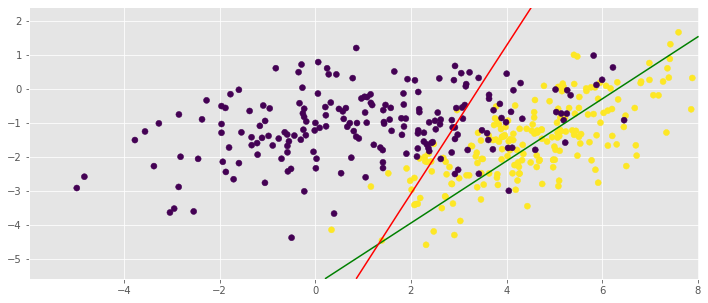

In [417]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

lin_clf = MySGDClassifier(batch_generator=batch_generator,
                          model_type='lin_reg')
log_clf = MySGDClassifier(batch_generator=batch_generator,
                          model_type='log_reg')

plot_decision_boundary(lin_clf)
plot_decision_boundary(log_clf)

plt.scatter(X[:, 0], X[:, 1], c=y)


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [418]:
from sklearn.datasets import make_classification

In [419]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

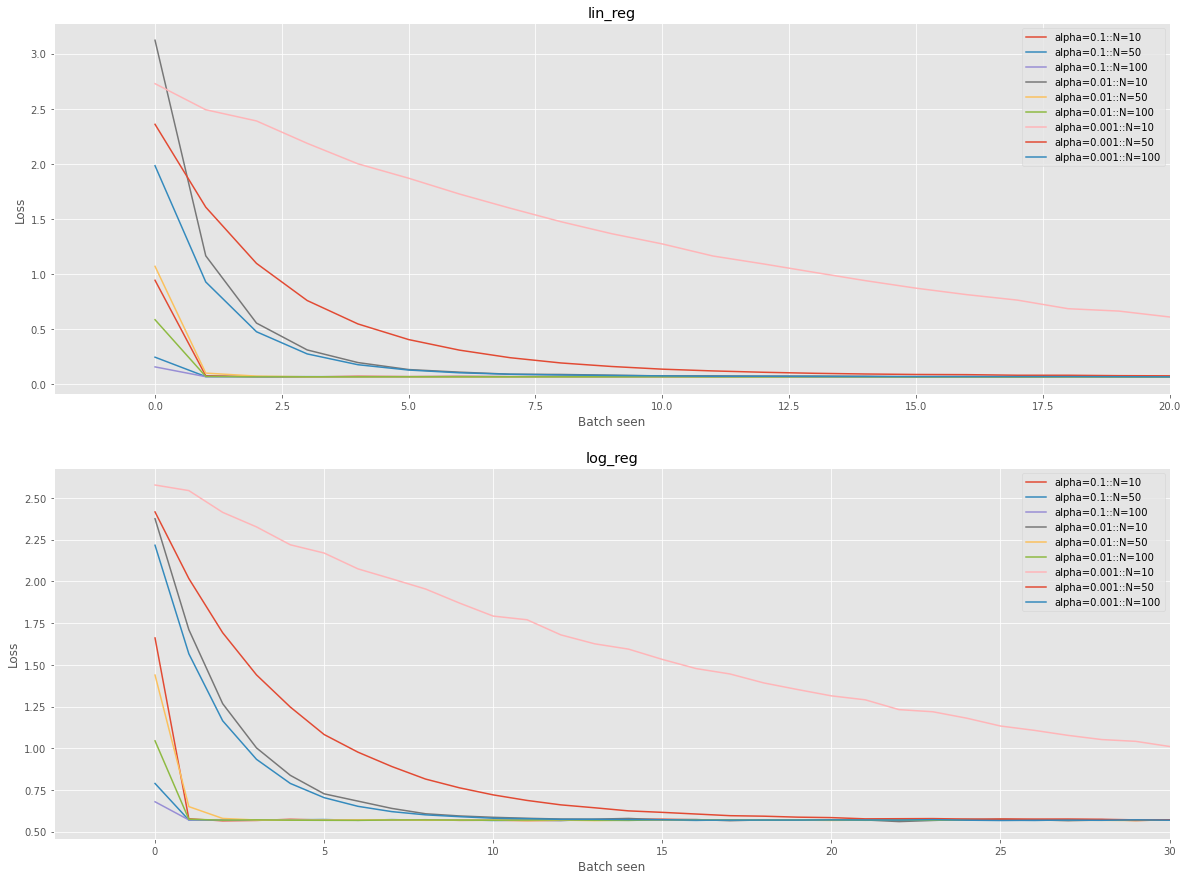

In [420]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
fig = plt.figure(figsize=(20, 15))
plots = {}
plots['lin_reg'] = fig.add_subplot(211)
plt.xlim(-2, 20)
plots['log_reg'] = fig.add_subplot(212)
plt.xlim(-3, 30)

batch_size = 100
for alpha in [0.1, 0.01, 0.001]:
    for mt in ['lin_reg', 'log_reg']:
        clf = MySGDClassifier(batch_generator=batch_generator, alpha=alpha,
                              model_type=mt, C=1, max_epoch=10)
        clf.fit(X, y, batch_size=batch_size)
        for N in [10, 50, 100]:
            mean_loss = np.mean(
                np.array(clf.errors_log['loss']).reshape(-1, N), axis=1)
            plots[mt].plot(mean_loss, label=f'{alpha=}::{N=}')

        plots[mt].set_title(mt)
        plots[mt].set_ylabel('Loss')
        plots[mt].set_xlabel('Batch seen')
        plots[mt].legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

<ipython-input-414-d31228f6b912>:54: RuntimeWarning: overflow encountered in matmul
  loss = (amount_div / 2) * (diff.T @ diff) + reg
<ipython-input-414-d31228f6b912>:45: RuntimeWarning: overflow encountered in double_scalars
  reg = reg_mult * reg_weights
<ipython-input-414-d31228f6b912>:44: RuntimeWarning: overflow encountered in square
  reg_weights = np.sum(self.weights[1:] ** 2)
/Users/bangod/anaconda3/envs/py385/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-414-d31228f6b912>:75: RuntimeWarning: overflow encountered in multiply
  reg = reg_mult * self.weights[1:]
<ipython-input-414-d31228f6b912>:77: RuntimeWarning: overflow encountered in matmul
  loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0, reg))
<ipython-input-414-d31228f6b912>:40: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights
<ipython-input-414-d31

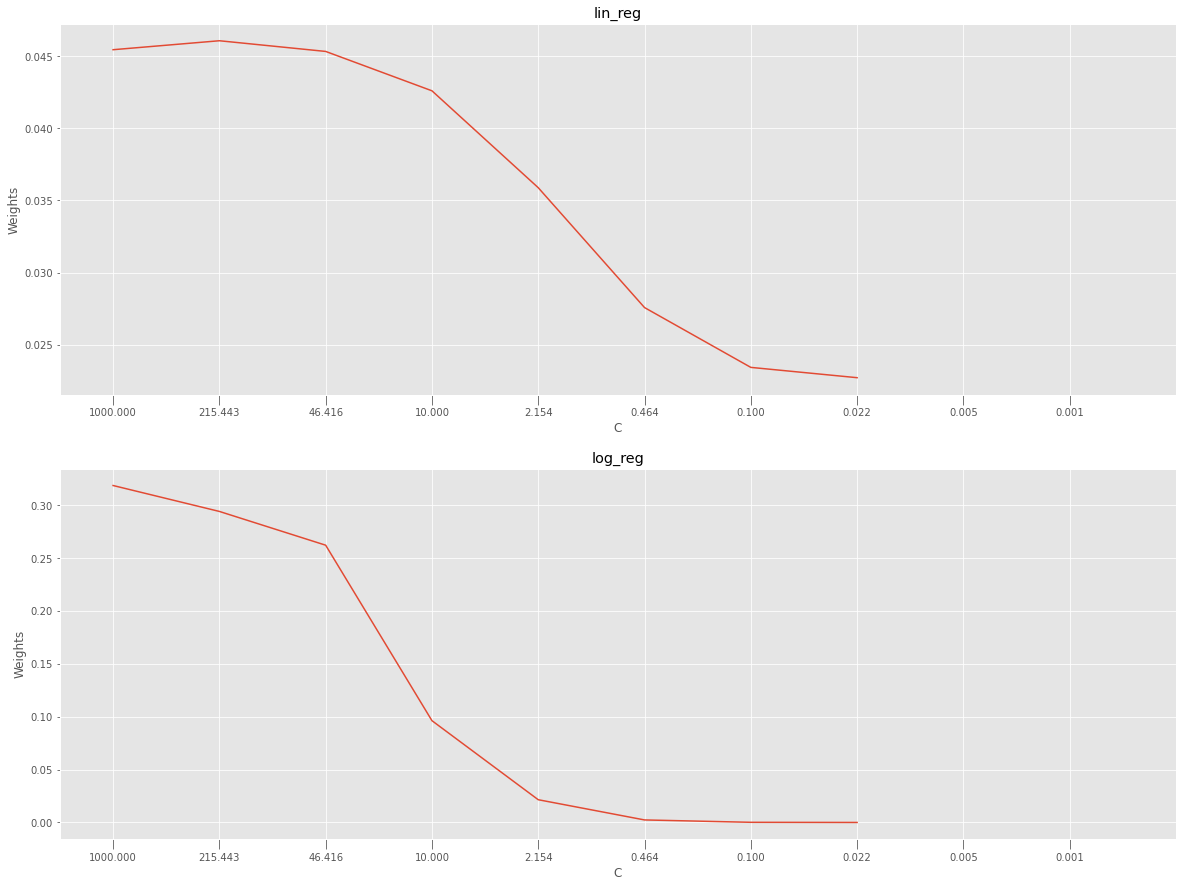

In [421]:
fig = plt.figure(figsize=(20, 15))
plots = {}
plots['lin_reg'] = fig.add_subplot(211)
plt.xlim(-0.5, 10)
plots['log_reg'] = fig.add_subplot(212)
plt.xlim(-0.5, 10)
plots['lin_reg']
for mt in ['lin_reg', 'log_reg']:
    res = []
    for C in np.logspace(3, -3, 10):
        clf = MySGDClassifier(batch_generator=batch_generator, alpha=0.01,
                              model_type=mt, C=C, max_epoch=1)
        clf.fit(X, y, batch_size=100)
        res.append(np.mean(clf.weights ** 2))

    plots[mt].xaxis.set_major_locator(FixedLocator(np.arange(10)))
    plots[mt].xaxis.set_major_formatter(FixedFormatter(
        [f'{num:.3f}' for num in np.logspace(3, -3, 10)]))
    plots[mt].tick_params(axis='x', which='major', length=10)
    plots[mt].plot(res)
    plots[mt].set_title(mt)
    plots[mt].set_ylabel('Weights')
    plots[mt].set_xlabel('C')

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [468]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [469]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [470]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [493]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [494]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [512]:
for mt in ['lin_reg', 'log_reg']:
    model = MySGDClassifier(batch_generator, model_type=mt)
    for batch_size in [32, 64, 128, 256, 512, 1024, 2048]:
        model.fit(X_train_norm, y_train, batch_size)
        print(f'{mt}::{batch_size}::{f1_score(y_train, model.predict(X_train_norm) > 0.5)}')
    print()

lin_reg::32::0.46428571428571436
lin_reg::64::0.5
lin_reg::128::0.49343414245921213
lin_reg::256::0.5014760873843732
lin_reg::512::0.48022598870056493
lin_reg::1024::0.46803278688524597
lin_reg::2048::0.42850990525409133

log_reg::32::0.3659863945578231
log_reg::64::0.34820607175712975
log_reg::128::0.4304282974643085
log_reg::256::0.5010833169194406
log_reg::512::0.5685583362707084
log_reg::1024::0.5989151244416081
log_reg::2048::0.600138217000691



In [ ]:
batch_size = 512

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [514]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False)
for batch_size in [256, 512, 1024, 2048]:
    for th in np.arange(0.3, 0.7, 0.05):
        for model_type in ['lin_reg', 'log_reg']:
            for C in [0.3, 1, 3, 10, 100, 300]:
                for alpha in [0.1, 0.03, 0.01, 0.003]:
                    for max_epoch in [1, 10, 100]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        print(
                            f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
                    print()
                print()
            print()
        print()
    print()

256::0.3::lin_reg::0.3::0.1::1::0.35192704245768475
256::0.3::lin_reg::0.3::0.1::10::0.33731355228619775


<ipython-input-414-d31228f6b912>:54: RuntimeWarning: overflow encountered in matmul
  loss = (amount_div / 2) * (diff.T @ diff) + reg
<ipython-input-414-d31228f6b912>:45: RuntimeWarning: overflow encountered in double_scalars
  reg = reg_mult * reg_weights
/Users/bangod/anaconda3/envs/py385/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-414-d31228f6b912>:44: RuntimeWarning: overflow encountered in square
  reg_weights = np.sum(self.weights[1:] ** 2)
<ipython-input-414-d31228f6b912>:77: RuntimeWarning: overflow encountered in matmul
  loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0, reg))
<ipython-input-414-d31228f6b912>:40: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights
<ipython-input-414-d31228f6b912>:66: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights
<ipython-input-414-d31228f

256::0.3::lin_reg::0.3::0.1::100::0.0

256::0.3::lin_reg::0.3::0.03::1::0.6015829940917129
256::0.3::lin_reg::0.3::0.03::10::0.6098515063546011
256::0.3::lin_reg::0.3::0.03::100::0.6096292970468856

256::0.3::lin_reg::0.3::0.01::1::0.5284322390767741
256::0.3::lin_reg::0.3::0.01::10::0.6093221444448143
256::0.3::lin_reg::0.3::0.01::100::0.6100123506726229

256::0.3::lin_reg::0.3::0.003::1::0.43002709094263614
256::0.3::lin_reg::0.3::0.003::10::0.6027840505602533
256::0.3::lin_reg::0.3::0.003::100::0.6103137615811627


256::0.3::lin_reg::1::0.1::1::0.3454670266315792
256::0.3::lin_reg::1::0.1::10::0.4571413517503271
256::0.3::lin_reg::1::0.1::100::0.0

256::0.3::lin_reg::1::0.03::1::0.6048323633923656
256::0.3::lin_reg::1::0.03::10::0.6106508622227589
256::0.3::lin_reg::1::0.03::100::0.6106920196570347

256::0.3::lin_reg::1::0.01::1::0.5166993054230369
256::0.3::lin_reg::1::0.01::10::0.6107562921421764
256::0.3::lin_reg::1::0.01::100::0.6111861661284246

256::0.3::lin_reg::1::0.003::1::

256::0.35::lin_reg::1::0.03::100::0.5928766141906351

256::0.35::lin_reg::1::0.01::1::0.5009025864889118
256::0.35::lin_reg::1::0.01::10::0.597635327149524
256::0.35::lin_reg::1::0.01::100::0.6004428753981965

256::0.35::lin_reg::1::0.003::1::0.40166305722744483
256::0.35::lin_reg::1::0.003::10::0.5820176995556399
256::0.35::lin_reg::1::0.003::100::0.597882842068867


256::0.35::lin_reg::3::0.1::1::0.3478589424648352
256::0.35::lin_reg::3::0.1::10::0.42515848682263185
256::0.35::lin_reg::3::0.1::100::0.0

256::0.35::lin_reg::3::0.03::1::0.5673776580749582
256::0.35::lin_reg::3::0.03::10::0.599536643876956
256::0.35::lin_reg::3::0.03::100::0.5976442830491913

256::0.35::lin_reg::3::0.01::1::0.4429140520560379
256::0.35::lin_reg::3::0.01::10::0.600103272512533
256::0.35::lin_reg::3::0.01::100::0.598439860903166

256::0.35::lin_reg::3::0.003::1::0.4432149263706194
256::0.35::lin_reg::3::0.003::10::0.562238139611412
256::0.35::lin_reg::3::0.003::100::0.6000444108014996


256::0.35::lin_reg

256::0.39999999999999997::lin_reg::1::0.003::100::0.5710614221348823


256::0.39999999999999997::lin_reg::3::0.1::1::0.4250890699643664
256::0.39999999999999997::lin_reg::3::0.1::10::0.3665397737809139
256::0.39999999999999997::lin_reg::3::0.1::100::0.0

256::0.39999999999999997::lin_reg::3::0.03::1::0.5438074074096029
256::0.39999999999999997::lin_reg::3::0.03::10::0.5631027252277386
256::0.39999999999999997::lin_reg::3::0.03::100::0.5745350718941671

256::0.39999999999999997::lin_reg::3::0.01::1::0.45747027490739633
256::0.39999999999999997::lin_reg::3::0.01::10::0.5706906511800064
256::0.39999999999999997::lin_reg::3::0.01::100::0.5741843119105712

256::0.39999999999999997::lin_reg::3::0.003::1::0.39133208067257164
256::0.39999999999999997::lin_reg::3::0.003::10::0.5320933244850187
256::0.39999999999999997::lin_reg::3::0.003::100::0.5741685136801709


256::0.39999999999999997::lin_reg::10::0.1::1::0.5327896478599586
256::0.39999999999999997::lin_reg::10::0.1::10::0.1838401478096404


256::0.44999999999999996::lin_reg::0.3::0.1::100::0.0

256::0.44999999999999996::lin_reg::0.3::0.03::1::0.4830181367968249
256::0.44999999999999996::lin_reg::0.3::0.03::10::0.5070064866446864
256::0.44999999999999996::lin_reg::0.3::0.03::100::0.5139643768096974

256::0.44999999999999996::lin_reg::0.3::0.01::1::0.3290762121175165
256::0.44999999999999996::lin_reg::0.3::0.01::10::0.4910130317898812
256::0.44999999999999996::lin_reg::0.3::0.01::100::0.4912529974879984

256::0.44999999999999996::lin_reg::0.3::0.003::1::0.2530986345974173
256::0.44999999999999996::lin_reg::0.3::0.003::10::0.46517981250718315
256::0.44999999999999996::lin_reg::0.3::0.003::100::0.5015693408129107


256::0.44999999999999996::lin_reg::1::0.1::1::0.4544468841345483
256::0.44999999999999996::lin_reg::1::0.1::10::0.257185118270141
256::0.44999999999999996::lin_reg::1::0.1::100::0.0

256::0.44999999999999996::lin_reg::1::0.03::1::0.4721229756174085
256::0.44999999999999996::lin_reg::1::0.03::10::0.5360464208004007


256::0.44999999999999996::log_reg::100::0.03::100::0.5451610106762619

256::0.44999999999999996::log_reg::100::0.01::1::0.5933733477693692
256::0.44999999999999996::log_reg::100::0.01::10::0.5892429719040402
256::0.44999999999999996::log_reg::100::0.01::100::0.5405502859928343

256::0.44999999999999996::log_reg::100::0.003::1::0.40819638055048585
256::0.44999999999999996::log_reg::100::0.003::10::0.5946067133510847
256::0.44999999999999996::log_reg::100::0.003::100::0.5612231603778899


256::0.44999999999999996::log_reg::300::0.1::1::0.5872153921476306
256::0.44999999999999996::log_reg::300::0.1::10::0.5506224906901652
256::0.44999999999999996::log_reg::300::0.1::100::0.5488689709343568

256::0.44999999999999996::log_reg::300::0.03::1::0.6028350905876698
256::0.44999999999999996::log_reg::300::0.03::10::0.559344320965369
256::0.44999999999999996::log_reg::300::0.03::100::0.5423841806225388

256::0.44999999999999996::log_reg::300::0.01::1::0.45344369580814564
256::0.44999999999999996::l

256::0.49999999999999994::log_reg::3::0.01::100::0.4573808777568627

256::0.49999999999999994::log_reg::3::0.003::1::0.4750571233315878
256::0.49999999999999994::log_reg::3::0.003::10::0.5949352999616062
256::0.49999999999999994::log_reg::3::0.003::100::0.4839188641846633


256::0.49999999999999994::log_reg::10::0.1::1::0.5623603069176888
256::0.49999999999999994::log_reg::10::0.1::10::0.4973424973353667
256::0.49999999999999994::log_reg::10::0.1::100::0.49418562280683725

256::0.49999999999999994::log_reg::10::0.03::1::0.598077417800409
256::0.49999999999999994::log_reg::10::0.03::10::0.5161976256621957
256::0.49999999999999994::log_reg::10::0.03::100::0.49029377814818886

256::0.49999999999999994::log_reg::10::0.01::1::0.3777295916582347
256::0.49999999999999994::log_reg::10::0.01::10::0.5685870002733353
256::0.49999999999999994::log_reg::10::0.01::100::0.49574276713164106

256::0.49999999999999994::log_reg::10::0.003::1::0.35512680800940244
256::0.49999999999999994::log_reg::10::0.0

256::0.5499999999999999::log_reg::0.3::0.003::10::0.4130358461793403
256::0.5499999999999999::log_reg::0.3::0.003::100::0.025482414655244708


256::0.5499999999999999::log_reg::1::0.1::1::0.4311068879800913
256::0.5499999999999999::log_reg::1::0.1::10::0.24720268979174076
256::0.5499999999999999::log_reg::1::0.1::100::0.29264025239262076

256::0.5499999999999999::log_reg::1::0.03::1::0.5527124179516744
256::0.5499999999999999::log_reg::1::0.03::10::0.31585627542056677
256::0.5499999999999999::log_reg::1::0.03::100::0.27599574283764383

256::0.5499999999999999::log_reg::1::0.01::1::0.583284393395297
256::0.5499999999999999::log_reg::1::0.01::10::0.4339588306510633
256::0.5499999999999999::log_reg::1::0.01::100::0.26779065506597777

256::0.5499999999999999::log_reg::1::0.003::1::0.4384590936009774
256::0.5499999999999999::log_reg::1::0.003::10::0.5492078238317829
256::0.5499999999999999::log_reg::1::0.003::100::0.31237985175105404


256::0.5499999999999999::log_reg::3::0.1::1::0.51206764

<ipython-input-414-d31228f6b912>:86: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad


256::0.5999999999999999::lin_reg::100::0.1::100::0.0

256::0.5999999999999999::lin_reg::100::0.03::1::0.37886638734404715
256::0.5999999999999999::lin_reg::100::0.03::10::0.3545989864795954
256::0.5999999999999999::lin_reg::100::0.03::100::0.40809375331335485

256::0.5999999999999999::lin_reg::100::0.01::1::0.32817460965910217
256::0.5999999999999999::lin_reg::100::0.01::10::0.4018227565776041
256::0.5999999999999999::lin_reg::100::0.01::100::0.39035173293943454

256::0.5999999999999999::lin_reg::100::0.003::1::0.2684254406196465
256::0.5999999999999999::lin_reg::100::0.003::10::0.39776575294469296
256::0.5999999999999999::lin_reg::100::0.003::100::0.40858552656329783


256::0.5999999999999999::lin_reg::300::0.1::1::0.34402474289069007
256::0.5999999999999999::lin_reg::300::0.1::10::0.4466357496430833
256::0.5999999999999999::lin_reg::300::0.1::100::0.0

256::0.5999999999999999::lin_reg::300::0.03::1::0.35762684377950144
256::0.5999999999999999::lin_reg::300::0.03::10::0.43178882949839

256::0.6499999999999999::lin_reg::3::0.03::100::0.3034508805008833

256::0.6499999999999999::lin_reg::3::0.01::1::0.2584801401959061
256::0.6499999999999999::lin_reg::3::0.01::10::0.33386813167391977
256::0.6499999999999999::lin_reg::3::0.01::100::0.3213324758729409

256::0.6499999999999999::lin_reg::3::0.003::1::0.271388693067903
256::0.6499999999999999::lin_reg::3::0.003::10::0.2979726226627549
256::0.6499999999999999::lin_reg::3::0.003::100::0.33462977086835305


256::0.6499999999999999::lin_reg::10::0.1::1::0.4263863557686916
256::0.6499999999999999::lin_reg::10::0.1::10::0.33327076022503077
256::0.6499999999999999::lin_reg::10::0.1::100::0.0

256::0.6499999999999999::lin_reg::10::0.03::1::0.37161942863700853
256::0.6499999999999999::lin_reg::10::0.03::10::0.31908191807243275
256::0.6499999999999999::lin_reg::10::0.03::100::0.3307797517574977

256::0.6499999999999999::lin_reg::10::0.01::1::0.28281529956675866
256::0.6499999999999999::lin_reg::10::0.01::10::0.3350584381682249
256::0

512::0.3::lin_reg::0.3::0.01::100::0.6098901417014747

512::0.3::lin_reg::0.3::0.003::1::0.37909347227739926
512::0.3::lin_reg::0.3::0.003::10::0.5659341875066201
512::0.3::lin_reg::0.3::0.003::100::0.6102231272389876


512::0.3::lin_reg::1::0.1::1::0.5290371449632529
512::0.3::lin_reg::1::0.1::10::0.45704868297596324
512::0.3::lin_reg::1::0.1::100::0.0

512::0.3::lin_reg::1::0.03::1::0.5627862551265792
512::0.3::lin_reg::1::0.03::10::0.6107671838981377
512::0.3::lin_reg::1::0.03::100::0.611034695342532

512::0.3::lin_reg::1::0.01::1::0.4190484747571839
512::0.3::lin_reg::1::0.01::10::0.6092806394056753
512::0.3::lin_reg::1::0.01::100::0.6104008685900245

512::0.3::lin_reg::1::0.003::1::0.43026488574952043
512::0.3::lin_reg::1::0.003::10::0.5495734293136973
512::0.3::lin_reg::1::0.003::100::0.6105496948846691


512::0.3::lin_reg::3::0.1::1::0.44318643993548124
512::0.3::lin_reg::3::0.1::10::0.33375844919653136
512::0.3::lin_reg::3::0.1::100::0.0

512::0.3::lin_reg::3::0.03::1::0.530785

512::0.35::lin_reg::1::0.003::100::0.598211362155412


512::0.35::lin_reg::3::0.1::1::0.42742169468624847
512::0.35::lin_reg::3::0.1::10::0.29146896496886576
512::0.35::lin_reg::3::0.1::100::0.0

512::0.35::lin_reg::3::0.03::1::0.4886081639421949
512::0.35::lin_reg::3::0.03::10::0.6018673214967427
512::0.35::lin_reg::3::0.03::100::0.6008648371607613

512::0.35::lin_reg::3::0.01::1::0.4587300293169407
512::0.35::lin_reg::3::0.01::10::0.5878510894871471
512::0.35::lin_reg::3::0.01::100::0.5998269507785133

512::0.35::lin_reg::3::0.003::1::0.340420537656999
512::0.35::lin_reg::3::0.003::10::0.5262029609931937
512::0.35::lin_reg::3::0.003::100::0.6003768194657157


512::0.35::lin_reg::10::0.1::1::0.6093575773132621
512::0.35::lin_reg::10::0.1::10::0.34520976314044866
512::0.35::lin_reg::10::0.1::100::0.0

512::0.35::lin_reg::10::0.03::1::0.512601242971767
512::0.35::lin_reg::10::0.03::10::0.5980602570141528
512::0.35::lin_reg::10::0.03::100::0.6007849637515159

512::0.35::lin_reg::10::0.01

512::0.39999999999999997::lin_reg::3::0.03::100::0.5649343648805348

512::0.39999999999999997::lin_reg::3::0.01::1::0.38196848266204975
512::0.39999999999999997::lin_reg::3::0.01::10::0.5703454684200027
512::0.39999999999999997::lin_reg::3::0.01::100::0.576115579101266

512::0.39999999999999997::lin_reg::3::0.003::1::0.32501865633894
512::0.39999999999999997::lin_reg::3::0.003::10::0.48723506391686
512::0.39999999999999997::lin_reg::3::0.003::100::0.5747843206539718


512::0.39999999999999997::lin_reg::10::0.1::1::0.45492051178085313
512::0.39999999999999997::lin_reg::10::0.1::10::0.4199596469583873
512::0.39999999999999997::lin_reg::10::0.1::100::0.0

512::0.39999999999999997::lin_reg::10::0.03::1::0.4784121977990002
512::0.39999999999999997::lin_reg::10::0.03::10::0.5629234002159559
512::0.39999999999999997::lin_reg::10::0.03::100::0.5710397432988044

512::0.39999999999999997::lin_reg::10::0.01::1::0.4254105329649084
512::0.39999999999999997::lin_reg::10::0.01::10::0.5409545560846475

512::0.44999999999999996::lin_reg::0.3::0.01::100::0.4994454891890575

512::0.44999999999999996::lin_reg::0.3::0.003::1::0.1383233578116405
512::0.44999999999999996::lin_reg::0.3::0.003::10::0.3941716533954008
512::0.44999999999999996::lin_reg::0.3::0.003::100::0.5067731090457732


512::0.44999999999999996::lin_reg::1::0.1::1::0.4984503801486381
512::0.44999999999999996::lin_reg::1::0.1::10::0.5368138648898166
512::0.44999999999999996::lin_reg::1::0.1::100::0.0

512::0.44999999999999996::lin_reg::1::0.03::1::0.4212223524144528
512::0.44999999999999996::lin_reg::1::0.03::10::0.5014813564532645
512::0.44999999999999996::lin_reg::1::0.03::100::0.5176724281434446

512::0.44999999999999996::lin_reg::1::0.01::1::0.33103684554855944
512::0.44999999999999996::lin_reg::1::0.01::10::0.520188717608094
512::0.44999999999999996::lin_reg::1::0.01::100::0.5330517952153242

512::0.44999999999999996::lin_reg::1::0.003::1::0.249143815761271
512::0.44999999999999996::lin_reg::1::0.003::10::0.428098119810

512::0.44999999999999996::log_reg::100::0.003::100::0.5790682108186888


512::0.44999999999999996::log_reg::300::0.1::1::0.5972393258376119
512::0.44999999999999996::log_reg::300::0.1::10::0.5561777950871881
512::0.44999999999999996::log_reg::300::0.1::100::0.5465911600493765

512::0.44999999999999996::log_reg::300::0.03::1::0.5833712144597415
512::0.44999999999999996::log_reg::300::0.03::10::0.5783562650505429
512::0.44999999999999996::log_reg::300::0.03::100::0.544964242352632

512::0.44999999999999996::log_reg::300::0.01::1::0.5874585679162656
512::0.44999999999999996::log_reg::300::0.01::10::0.6051493823180573
512::0.44999999999999996::log_reg::300::0.01::100::0.550827410908387

512::0.44999999999999996::log_reg::300::0.003::1::0.39706966979193353
512::0.44999999999999996::log_reg::300::0.003::10::0.5695443742976081
512::0.44999999999999996::log_reg::300::0.003::100::0.5859626234265919




512::0.49999999999999994::lin_reg::0.3::0.1::1::0.34607241414378176
512::0.49999999999999994:

512::0.49999999999999994::log_reg::10::0.1::100::0.4897750834526741

512::0.49999999999999994::log_reg::10::0.03::1::0.5918620484446058
512::0.49999999999999994::log_reg::10::0.03::10::0.5556879522482351
512::0.49999999999999994::log_reg::10::0.03::100::0.4969202491123229

512::0.49999999999999994::log_reg::10::0.01::1::0.5709775207902676
512::0.49999999999999994::log_reg::10::0.01::10::0.5905944505297517
512::0.49999999999999994::log_reg::10::0.01::100::0.5030036337394801

512::0.49999999999999994::log_reg::10::0.003::1::0.5402056548521295
512::0.49999999999999994::log_reg::10::0.003::10::0.5665596482142226
512::0.49999999999999994::log_reg::10::0.003::100::0.55327068678169


512::0.49999999999999994::log_reg::100::0.1::1::0.5871510894906944
512::0.49999999999999994::log_reg::100::0.1::10::0.5134610038226408
512::0.49999999999999994::log_reg::100::0.1::100::0.5104843943077435

512::0.49999999999999994::log_reg::100::0.03::1::0.5622372711580267
512::0.49999999999999994::log_reg::100::0

512::0.5499999999999999::log_reg::1::0.03::100::0.28278990284455535

512::0.5499999999999999::log_reg::1::0.01::1::0.5265983823097938
512::0.5499999999999999::log_reg::1::0.01::10::0.5117394475730797
512::0.5499999999999999::log_reg::1::0.01::100::0.2869066097517606

512::0.5499999999999999::log_reg::1::0.003::1::0.40153264791591053
512::0.5499999999999999::log_reg::1::0.003::10::0.5550709933511616
512::0.5499999999999999::log_reg::1::0.003::100::0.3914492903195968


512::0.5499999999999999::log_reg::3::0.1::1::0.5542860012377238
512::0.5499999999999999::log_reg::3::0.1::10::0.42235949450671634
512::0.5499999999999999::log_reg::3::0.1::100::0.3983233617528928

512::0.5499999999999999::log_reg::3::0.03::1::0.5513335314938089
512::0.5499999999999999::log_reg::3::0.03::10::0.4762920752014095
512::0.5499999999999999::log_reg::3::0.03::100::0.40795673180551867

512::0.5499999999999999::log_reg::3::0.01::1::0.17065494102656867
512::0.5499999999999999::log_reg::3::0.01::10::0.5607795386936313

512::0.5999999999999999::lin_reg::300::0.01::100::0.41855241638870727

512::0.5999999999999999::lin_reg::300::0.003::1::0.1626844301214677
512::0.5999999999999999::lin_reg::300::0.003::10::0.34758223392040793
512::0.5999999999999999::lin_reg::300::0.003::100::0.412851782702173



512::0.5999999999999999::log_reg::0.3::0.1::1::0.13914009431248714
512::0.5999999999999999::log_reg::0.3::0.1::10::0.015924050632911392
512::0.5999999999999999::log_reg::0.3::0.1::100::0.013968253968253968

512::0.5999999999999999::log_reg::0.3::0.03::1::0.3230251069052009
512::0.5999999999999999::log_reg::0.3::0.03::10::0.02184388767991598
512::0.5999999999999999::log_reg::0.3::0.03::100::0.008493506493506494

512::0.5999999999999999::log_reg::0.3::0.01::1::0.35217786408694635
512::0.5999999999999999::log_reg::0.3::0.01::10::0.15091131082624404
512::0.5999999999999999::log_reg::0.3::0.01::100::0.008482982171799028

512::0.5999999999999999::log_reg::0.3::0.003::1::0.1861962812220042
512::0.5999999999999999::lo

512::0.6499999999999999::lin_reg::10::0.003::100::0.3314353028120537


512::0.6499999999999999::lin_reg::100::0.1::1::0.4580475925101096
512::0.6499999999999999::lin_reg::100::0.1::10::0.43952051571278095
512::0.6499999999999999::lin_reg::100::0.1::100::0.0

512::0.6499999999999999::lin_reg::100::0.03::1::0.3099897316234214
512::0.6499999999999999::lin_reg::100::0.03::10::0.3742937834841504
512::0.6499999999999999::lin_reg::100::0.03::100::0.3417743474028683

512::0.6499999999999999::lin_reg::100::0.01::1::0.20629001317481482
512::0.6499999999999999::lin_reg::100::0.01::10::0.34762111045289323
512::0.6499999999999999::lin_reg::100::0.01::100::0.338501149228294

512::0.6499999999999999::lin_reg::100::0.003::1::0.3821272761965708
512::0.6499999999999999::lin_reg::100::0.003::10::0.28338047320503645
512::0.6499999999999999::lin_reg::100::0.003::100::0.3236628722494987


512::0.6499999999999999::lin_reg::300::0.1::1::0.4384959100604579
512::0.6499999999999999::lin_reg::300::0.1::10::0.3341

1024::0.3::lin_reg::3::0.01::100::0.6114236779417928

1024::0.3::lin_reg::3::0.003::1::0.2722785482825395
1024::0.3::lin_reg::3::0.003::10::0.5091694542175884
1024::0.3::lin_reg::3::0.003::100::0.6072517322444682


1024::0.3::lin_reg::10::0.1::1::0.6090886970435461
1024::0.3::lin_reg::10::0.1::10::0.18287743660682748
1024::0.3::lin_reg::10::0.1::100::0.46239959633422567

1024::0.3::lin_reg::10::0.03::1::0.4000898534279072
1024::0.3::lin_reg::10::0.03::10::0.5893047705050118
1024::0.3::lin_reg::10::0.03::100::0.6118491616873383

1024::0.3::lin_reg::10::0.01::1::0.4379030125881676
1024::0.3::lin_reg::10::0.01::10::0.5391028125504522
1024::0.3::lin_reg::10::0.01::100::0.6108349767537422

1024::0.3::lin_reg::10::0.003::1::0.43285007380359586
1024::0.3::lin_reg::10::0.003::10::0.45820502829944665
1024::0.3::lin_reg::10::0.003::100::0.5911301902316743


1024::0.3::lin_reg::100::0.1::1::0.27320302257046264
1024::0.3::lin_reg::100::0.1::10::0.27292007560712533
1024::0.3::lin_reg::100::0.1::100

1024::0.35::lin_reg::10::0.03::100::0.6066298521358456

1024::0.35::lin_reg::10::0.01::1::0.4010769649539374
1024::0.35::lin_reg::10::0.01::10::0.5307489214563329
1024::0.35::lin_reg::10::0.01::100::0.6030756202167196

1024::0.35::lin_reg::10::0.003::1::0.33722269357240225
1024::0.35::lin_reg::10::0.003::10::0.4676709114366398
1024::0.35::lin_reg::10::0.003::100::0.5743547676168829


1024::0.35::lin_reg::100::0.1::1::0.6084423736711744
1024::0.35::lin_reg::100::0.1::10::0.43980856354993314
1024::0.35::lin_reg::100::0.1::100::0.2928205329289795

1024::0.35::lin_reg::100::0.03::1::0.45021049135928
1024::0.35::lin_reg::100::0.03::10::0.5611411757544452
1024::0.35::lin_reg::100::0.03::100::0.598161212345893

1024::0.35::lin_reg::100::0.01::1::0.4087266133290116
1024::0.35::lin_reg::100::0.01::10::0.5002999871505411
1024::0.35::lin_reg::100::0.01::100::0.5890972577956303

1024::0.35::lin_reg::100::0.003::1::0.35666102416232076
1024::0.35::lin_reg::100::0.003::10::0.4749004620468729
1024::0.

1024::0.39999999999999997::lin_reg::10::0.1::100::0.3827601872842516

1024::0.39999999999999997::lin_reg::10::0.03::1::0.4327055907084971
1024::0.39999999999999997::lin_reg::10::0.03::10::0.5583952622337895
1024::0.39999999999999997::lin_reg::10::0.03::100::0.570820156480484

1024::0.39999999999999997::lin_reg::10::0.01::1::0.3861770137687932
1024::0.39999999999999997::lin_reg::10::0.01::10::0.5233561714185713
1024::0.39999999999999997::lin_reg::10::0.01::100::0.5750571653883751

1024::0.39999999999999997::lin_reg::10::0.003::1::0.3044732411595716
1024::0.39999999999999997::lin_reg::10::0.003::10::0.4502858566659568
1024::0.39999999999999997::lin_reg::10::0.003::100::0.553692267534521


1024::0.39999999999999997::lin_reg::100::0.1::1::0.4081210115895758
1024::0.39999999999999997::lin_reg::100::0.1::10::0.45538735120472096
1024::0.39999999999999997::lin_reg::100::0.1::100::0.42545344470538504

1024::0.39999999999999997::lin_reg::100::0.03::1::0.46022464222197934
1024::0.3999999999999999

1024::0.44999999999999996::lin_reg::1::0.1::100::0.2251506776328009

1024::0.44999999999999996::lin_reg::1::0.03::1::0.3938938600833236
1024::0.44999999999999996::lin_reg::1::0.03::10::0.5399313559456569
1024::0.44999999999999996::lin_reg::1::0.03::100::0.5317546118255183

1024::0.44999999999999996::lin_reg::1::0.01::1::0.33862968827958173
1024::0.44999999999999996::lin_reg::1::0.01::10::0.4938709206797073
1024::0.44999999999999996::lin_reg::1::0.01::100::0.5312670097811288

1024::0.44999999999999996::lin_reg::1::0.003::1::0.2946788407722768
1024::0.44999999999999996::lin_reg::1::0.003::10::0.39790899759377
1024::0.44999999999999996::lin_reg::1::0.003::100::0.5294193461758961


1024::0.44999999999999996::lin_reg::3::0.1::1::0.5197263459551187
1024::0.44999999999999996::lin_reg::3::0.1::10::0.352187343394042
1024::0.44999999999999996::lin_reg::3::0.1::100::0.3351372211690281

1024::0.44999999999999996::lin_reg::3::0.03::1::0.39654800800306605
1024::0.44999999999999996::lin_reg::3::0.03:

1024::0.44999999999999996::log_reg::300::0.1::100::0.5451918680394832

1024::0.44999999999999996::log_reg::300::0.03::1::0.4286093124193724
1024::0.44999999999999996::log_reg::300::0.03::10::0.5890119457671074
1024::0.44999999999999996::log_reg::300::0.03::100::0.5436040922001214

1024::0.44999999999999996::log_reg::300::0.01::1::0.3883332667007873
1024::0.44999999999999996::log_reg::300::0.01::10::0.5931187248396887
1024::0.44999999999999996::log_reg::300::0.01::100::0.5626514170897513

1024::0.44999999999999996::log_reg::300::0.003::1::0.3987254029016828
1024::0.44999999999999996::log_reg::300::0.003::10::0.4976546431706744
1024::0.44999999999999996::log_reg::300::0.003::100::0.6036351788307472




1024::0.49999999999999994::lin_reg::0.3::0.1::1::0.32959234720503267
1024::0.49999999999999994::lin_reg::0.3::0.1::10::0.3454854918140821
1024::0.49999999999999994::lin_reg::0.3::0.1::100::0.0

1024::0.49999999999999994::lin_reg::0.3::0.03::1::0.348119037383497
1024::0.49999999999999994::l

1024::0.49999999999999994::log_reg::10::0.1::100::0.49890962934868066

1024::0.49999999999999994::log_reg::10::0.03::1::0.359114448018762
1024::0.49999999999999994::log_reg::10::0.03::10::0.585885122979356
1024::0.49999999999999994::log_reg::10::0.03::100::0.49469737612080367

1024::0.49999999999999994::log_reg::10::0.01::1::0.5755993765078685
1024::0.49999999999999994::log_reg::10::0.01::10::0.58730355373134
1024::0.49999999999999994::log_reg::10::0.01::100::0.5214833486816142

1024::0.49999999999999994::log_reg::10::0.003::1::0.4399968711406159
1024::0.49999999999999994::log_reg::10::0.003::10::0.5508669804436831
1024::0.49999999999999994::log_reg::10::0.003::100::0.5901254808482559


1024::0.49999999999999994::log_reg::100::0.1::1::0.6035552084565177
1024::0.49999999999999994::log_reg::100::0.1::10::0.5411593352687218
1024::0.49999999999999994::log_reg::100::0.1::100::0.5084546460038513

1024::0.49999999999999994::log_reg::100::0.03::1::0.5457854796870891
1024::0.49999999999999994::

1024::0.5499999999999999::log_reg::1::0.1::100::0.26457405563422387

1024::0.5499999999999999::log_reg::1::0.03::1::0.5279318805438556
1024::0.5499999999999999::log_reg::1::0.03::10::0.46311089675033257
1024::0.5499999999999999::log_reg::1::0.03::100::0.2720018984471442

1024::0.5499999999999999::log_reg::1::0.01::1::0.4598382758792486
1024::0.5499999999999999::log_reg::1::0.01::10::0.5503274019380845
1024::0.5499999999999999::log_reg::1::0.01::100::0.3236587547558315

1024::0.5499999999999999::log_reg::1::0.003::1::0.43187233719552565
1024::0.5499999999999999::log_reg::1::0.003::10::0.5096007232094688
1024::0.5499999999999999::log_reg::1::0.003::100::0.46278035188133027


1024::0.5499999999999999::log_reg::3::0.1::1::0.5884097335816636
1024::0.5499999999999999::log_reg::3::0.1::10::0.4409871182594444
1024::0.5499999999999999::log_reg::3::0.1::100::0.4000481074696789

1024::0.5499999999999999::log_reg::3::0.03::1::0.5624183685900673
1024::0.5499999999999999::log_reg::3::0.03::10::0.543

1024::0.5999999999999999::lin_reg::300::0.1::100::0.2541848774739426

1024::0.5999999999999999::lin_reg::300::0.03::1::0.29895698252546354
1024::0.5999999999999999::lin_reg::300::0.03::10::0.4052670939911449
1024::0.5999999999999999::lin_reg::300::0.03::100::0.41378725091811397

1024::0.5999999999999999::lin_reg::300::0.01::1::0.28847488499276347
1024::0.5999999999999999::lin_reg::300::0.01::10::0.38640178694973215
1024::0.5999999999999999::lin_reg::300::0.01::100::0.4061539135904906

1024::0.5999999999999999::lin_reg::300::0.003::1::0.2816641916732165
1024::0.5999999999999999::lin_reg::300::0.003::10::0.36580406322937137
1024::0.5999999999999999::lin_reg::300::0.003::100::0.38576148118153497



1024::0.5999999999999999::log_reg::0.3::0.1::1::0.21000247419620915
1024::0.5999999999999999::log_reg::0.3::0.1::10::0.010561354567655022
1024::0.5999999999999999::log_reg::0.3::0.1::100::0.010974178762414058

1024::0.5999999999999999::log_reg::0.3::0.03::1::0.3363608857377042
1024::0.599999999

1024::0.6499999999999999::lin_reg::10::0.1::100::0.36419624989612964

1024::0.6499999999999999::lin_reg::10::0.03::1::0.22265601752871333
1024::0.6499999999999999::lin_reg::10::0.03::10::0.3646473578595898
1024::0.6499999999999999::lin_reg::10::0.03::100::0.3036535559749651

1024::0.6499999999999999::lin_reg::10::0.01::1::0.1906164754952599
1024::0.6499999999999999::lin_reg::10::0.01::10::0.3290130050624194
1024::0.6499999999999999::lin_reg::10::0.01::100::0.33745333769754016

1024::0.6499999999999999::lin_reg::10::0.003::1::0.2798161605913429
1024::0.6499999999999999::lin_reg::10::0.003::10::0.26159005769377863
1024::0.6499999999999999::lin_reg::10::0.003::100::0.3461148575756961


1024::0.6499999999999999::lin_reg::100::0.1::1::0.4623016379514187
1024::0.6499999999999999::lin_reg::100::0.1::10::0.3730306746024083
1024::0.6499999999999999::lin_reg::100::0.1::100::0.5380226545695576

1024::0.6499999999999999::lin_reg::100::0.03::1::0.23362619506003454
1024::0.6499999999999999::lin_reg:

2048::0.3::lin_reg::1::0.03::100::0.6103150651410029

2048::0.3::lin_reg::1::0.01::1::0.22595599907429836
2048::0.3::lin_reg::1::0.01::10::0.5547140618185458
2048::0.3::lin_reg::1::0.01::100::0.6106696049933754

2048::0.3::lin_reg::1::0.003::1::0.15756329698174473
2048::0.3::lin_reg::1::0.003::10::0.44957441586329744
2048::0.3::lin_reg::1::0.003::100::0.6067245979047562


2048::0.3::lin_reg::3::0.1::1::0.3464379781327835
2048::0.3::lin_reg::3::0.1::10::0.25753167537488575
2048::0.3::lin_reg::3::0.1::100::0.18327079117849643

2048::0.3::lin_reg::3::0.03::1::0.47613758475173
2048::0.3::lin_reg::3::0.03::10::0.5893547379962365
2048::0.3::lin_reg::3::0.03::100::0.6125232136507794

2048::0.3::lin_reg::3::0.01::1::0.34838753902059433
2048::0.3::lin_reg::3::0.01::10::0.5186301701016169
2048::0.3::lin_reg::3::0.01::100::0.6141103093701659

2048::0.3::lin_reg::3::0.003::1::0.32112717955043935
2048::0.3::lin_reg::3::0.003::10::0.4807967507639356
2048::0.3::lin_reg::3::0.003::100::0.5934221088680

2048::0.35::lin_reg::3::0.1::100::0.35200198321326837

2048::0.35::lin_reg::3::0.03::1::0.4321430910044709
2048::0.35::lin_reg::3::0.03::10::0.5855178022062774
2048::0.35::lin_reg::3::0.03::100::0.6015816529541371

2048::0.35::lin_reg::3::0.01::1::0.2854380738345602
2048::0.35::lin_reg::3::0.01::10::0.5051588904637528
2048::0.35::lin_reg::3::0.01::100::0.6024620084776013

2048::0.35::lin_reg::3::0.003::1::0.39090799939712834
2048::0.35::lin_reg::3::0.003::10::0.41068180467502613
2048::0.35::lin_reg::3::0.003::100::0.5710490753956698


2048::0.35::lin_reg::10::0.1::1::0.2887607842578933
2048::0.35::lin_reg::10::0.1::10::0.40863045230403083
2048::0.35::lin_reg::10::0.1::100::0.34749854036615346

2048::0.35::lin_reg::10::0.03::1::0.47399161034662196
2048::0.35::lin_reg::10::0.03::10::0.5599422735610851
2048::0.35::lin_reg::10::0.03::100::0.6024294015696255

2048::0.35::lin_reg::10::0.01::1::0.3134154526291389
2048::0.35::lin_reg::10::0.01::10::0.5168755928404976
2048::0.35::lin_reg::10::0

2048::0.39999999999999997::lin_reg::3::0.1::100::0.3360079324010745

2048::0.39999999999999997::lin_reg::3::0.03::1::0.38663002758627396
2048::0.39999999999999997::lin_reg::3::0.03::10::0.5506772740824966
2048::0.39999999999999997::lin_reg::3::0.03::100::0.5754832387007466

2048::0.39999999999999997::lin_reg::3::0.01::1::0.251659591089976
2048::0.39999999999999997::lin_reg::3::0.01::10::0.4832154115804519
2048::0.39999999999999997::lin_reg::3::0.01::100::0.5730637530783811

2048::0.39999999999999997::lin_reg::3::0.003::1::0.2688089854398776
2048::0.39999999999999997::lin_reg::3::0.003::10::0.38101051784369694
2048::0.39999999999999997::lin_reg::3::0.003::100::0.5578166510795752


2048::0.39999999999999997::lin_reg::10::0.1::1::0.2604195907308381
2048::0.39999999999999997::lin_reg::10::0.1::10::0.2574743796098172
2048::0.39999999999999997::lin_reg::10::0.1::100::0.608340352711164

2048::0.39999999999999997::lin_reg::10::0.03::1::0.43385996642954305
2048::0.39999999999999997::lin_reg::10

2048::0.44999999999999996::lin_reg::0.3::0.1::100::0.26258357626134543

2048::0.44999999999999996::lin_reg::0.3::0.03::1::0.2445048481423478
2048::0.44999999999999996::lin_reg::0.3::0.03::10::0.48078433651982344
2048::0.44999999999999996::lin_reg::0.3::0.03::100::0.5037968395109981

2048::0.44999999999999996::lin_reg::0.3::0.01::1::0.1250064318793494
2048::0.44999999999999996::lin_reg::0.3::0.01::10::0.36883101110862027
2048::0.44999999999999996::lin_reg::0.3::0.01::100::0.5086314876462261

2048::0.44999999999999996::lin_reg::0.3::0.003::1::0.17802040665698962
2048::0.44999999999999996::lin_reg::0.3::0.003::10::0.24867280440687195
2048::0.44999999999999996::lin_reg::0.3::0.003::100::0.4860015374375018


2048::0.44999999999999996::lin_reg::1::0.1::1::0.43821266172322365
2048::0.44999999999999996::lin_reg::1::0.1::10::0.38304171935500086
2048::0.44999999999999996::lin_reg::1::0.1::100::0.18299099470140892

2048::0.44999999999999996::lin_reg::1::0.03::1::0.35306947949447653
2048::0.449999

2048::0.44999999999999996::log_reg::100::0.1::100::0.5408811641771725

2048::0.44999999999999996::log_reg::100::0.03::1::0.5676777772354071
2048::0.44999999999999996::log_reg::100::0.03::10::0.6059087901988756
2048::0.44999999999999996::log_reg::100::0.03::100::0.5523972161927424

2048::0.44999999999999996::log_reg::100::0.01::1::0.3596698666640427
2048::0.44999999999999996::log_reg::100::0.01::10::0.5779314911942915
2048::0.44999999999999996::log_reg::100::0.01::100::0.5859812769149979

2048::0.44999999999999996::log_reg::100::0.003::1::0.36041520559983503
2048::0.44999999999999996::log_reg::100::0.003::10::0.448305997616761
2048::0.44999999999999996::log_reg::100::0.003::100::0.5930036986960072


2048::0.44999999999999996::log_reg::300::0.1::1::0.5617975806397878
2048::0.44999999999999996::log_reg::300::0.1::10::0.584695150983077
2048::0.44999999999999996::log_reg::300::0.1::100::0.5474333807364296

2048::0.44999999999999996::log_reg::300::0.03::1::0.46540464988127644
2048::0.4499999

2048::0.49999999999999994::log_reg::1::0.003::100::0.5812891482173266


2048::0.49999999999999994::log_reg::3::0.1::1::0.6045021282770607
2048::0.49999999999999994::log_reg::3::0.1::10::0.5424495670996085
2048::0.49999999999999994::log_reg::3::0.1::100::0.45514195925722606

2048::0.49999999999999994::log_reg::3::0.03::1::0.476066160919387
2048::0.49999999999999994::log_reg::3::0.03::10::0.5978308474311754
2048::0.49999999999999994::log_reg::3::0.03::100::0.47189593686281606

2048::0.49999999999999994::log_reg::3::0.01::1::0.3039937181381198
2048::0.49999999999999994::log_reg::3::0.01::10::0.5938261853762654
2048::0.49999999999999994::log_reg::3::0.01::100::0.5465438711704871

2048::0.49999999999999994::log_reg::3::0.003::1::0.36474988746574233
2048::0.49999999999999994::log_reg::3::0.003::10::0.4715284437370125
2048::0.49999999999999994::log_reg::3::0.003::100::0.5978103252297354


2048::0.49999999999999994::log_reg::10::0.1::1::0.5636152362021118
2048::0.49999999999999994::log_reg::10

2048::0.5499999999999999::lin_reg::300::0.003::100::0.4581561631786176



2048::0.5499999999999999::log_reg::0.3::0.1::1::0.4952863849044785
2048::0.5499999999999999::log_reg::0.3::0.1::10::0.11055490754590773
2048::0.5499999999999999::log_reg::0.3::0.1::100::0.018469121886811386

2048::0.5499999999999999::log_reg::0.3::0.03::1::0.19149580269174132
2048::0.5499999999999999::log_reg::0.3::0.03::10::0.36575041751557635
2048::0.5499999999999999::log_reg::0.3::0.03::100::0.02085900992364308

2048::0.5499999999999999::log_reg::0.3::0.01::1::0.33739237085029206
2048::0.5499999999999999::log_reg::0.3::0.01::10::0.48064984617309214
2048::0.5499999999999999::log_reg::0.3::0.01::100::0.0893457074438436

2048::0.5499999999999999::log_reg::0.3::0.003::1::0.49245956017110953
2048::0.5499999999999999::log_reg::0.3::0.003::10::0.37240834068112294
2048::0.5499999999999999::log_reg::0.3::0.003::100::0.3657924614202674


2048::0.5499999999999999::log_reg::1::0.1::1::0.5435283853612696
2048::0.5499999999

2048::0.5999999999999999::lin_reg::10::0.003::100::0.38106901895983014


2048::0.5999999999999999::lin_reg::100::0.1::1::0.24441227333626037
2048::0.5999999999999999::lin_reg::100::0.1::10::0.33668753425258513
2048::0.5999999999999999::lin_reg::100::0.1::100::0.2563349371092477

2048::0.5999999999999999::lin_reg::100::0.03::1::0.2869482102103206
2048::0.5999999999999999::lin_reg::100::0.03::10::0.39875629189988276
2048::0.5999999999999999::lin_reg::100::0.03::100::0.4040625507328196

2048::0.5999999999999999::lin_reg::100::0.01::1::0.362928656629285
2048::0.5999999999999999::lin_reg::100::0.01::10::0.34447607768738664
2048::0.5999999999999999::lin_reg::100::0.01::100::0.390414978427553

2048::0.5999999999999999::lin_reg::100::0.003::1::0.2901881583652407
2048::0.5999999999999999::lin_reg::100::0.003::10::0.2911056171383807
2048::0.5999999999999999::lin_reg::100::0.003::100::0.39628532768276453


2048::0.5999999999999999::lin_reg::300::0.1::1::0.6104938575092071
2048::0.5999999999999999

2048::0.6499999999999999::lin_reg::1::0.003::100::0.30027474951780814


2048::0.6499999999999999::lin_reg::3::0.1::1::0.4571300378168008
2048::0.6499999999999999::lin_reg::3::0.1::10::0.35258336594464157
2048::0.6499999999999999::lin_reg::3::0.1::100::0.3470833681293318

2048::0.6499999999999999::lin_reg::3::0.03::1::0.24212494857945135
2048::0.6499999999999999::lin_reg::3::0.03::10::0.3148084981008123
2048::0.6499999999999999::lin_reg::3::0.03::100::0.33382226307690194

2048::0.6499999999999999::lin_reg::3::0.01::1::0.20919800151414095
2048::0.6499999999999999::lin_reg::3::0.01::10::0.23834944039674824
2048::0.6499999999999999::lin_reg::3::0.01::100::0.33077903820999266

2048::0.6499999999999999::lin_reg::3::0.003::1::0.1054155248460256
2048::0.6499999999999999::lin_reg::3::0.003::10::0.19706773424704932
2048::0.6499999999999999::lin_reg::3::0.003::100::0.325250795626239


2048::0.6499999999999999::lin_reg::10::0.1::1::0.172952795295284
2048::0.6499999999999999::lin_reg::10::0.1::10::

2048::0.6499999999999999::log_reg::300::0.003::100::0.520192858068725







256::0.3::log_reg::10::0.01::100::0.6070136051178072
256::0.3::log_reg::10::0.003::100::0.6100276107190877
256::0.3::log_reg::100::0.1::10::0.6083703987824427
256::0.3::log_reg::100::0.1::100::0.6090789419410652
256::0.3::log_reg::100::0.03::10::0.6050175729120394
256::0.3::log_reg::100::0.03::100::0.6100398570526792
256::0.3::log_reg::10::0.03::10::0.6100287245949262
256::0.3::log_reg::10::0.03::100::0.6066784682728183
256::0.3::log_reg::10::0.1::10::0.6069982152953026
256::0.3::log_reg::10::0.1::100::0.6076576875577151
256::0.3::log_reg::3::0.003::100::0.6092675573793263
256::0.3::log_reg::3::0.01::100::0.6063923796549482
256::0.3::log_reg::3::0.1::10::0.6061523691238678
256::0.3::log_reg::3::0.1::100::0.6051926644187955
256::0.3::log_reg::1::0.01::100::0.6044064842666523
256::0.3::log_reg::0.3::0.03::10::0.6078754497762693
256::0.3::log_reg::1::0.1::10::0.6049323167851779
256::0.3::log_reg::1::0.1::100::0.6028187286876052
256::0.3::log_reg::0.3::0.003::100::0.6073770266558245

256::0.3::lin_reg::10::0.01::100::0.6125697499206828

256::0.3::lin_reg::10::0.03::10::0.6122478070747512
256::0.3::lin_reg::10::0.03::100::0.6123550287288559
256::0.3::lin_reg::1::0.01::100::0.6111861661284246
256::0.3::lin_reg::0.3::0.03::10::0.6098515063546011
256::0.3::lin_reg::0.3::0.03::100::0.6096292970468856
256::0.3::lin_reg::0.3::0.01::10::0.6093221444448143
256::0.3::lin_reg::0.3::0.01::100::0.6100123506726229

256::0.49999999999999994::log_reg::100::0.03::1::0.5945087712721078
256::0.49999999999999994::log_reg::10::0.003::10::0.5931299453660447
256::0.49999999999999994::log_reg::3::0.003::10::0.5949352999616062
256::0.49999999999999994::log_reg::3::0.03::1::0.5954916323173192
256::0.49999999999999994::log_reg::1::0.003::10::0.5955018570627657
256::0.49999999999999994::log_reg::0.3::0.01::1::0.6002513845278586
256::0.44999999999999996::log_reg::100::0.003::10::0.5946067133510847
256::0.44999999999999996::log_reg::100::0.1::1::0.5948711022457062
256::0.44999999999999996::log_reg::100::0.03::1::0.5962654720283462
256::0.44999999999999996::log_reg::100::0.1::1::0.5948711022457062
256::0.44999999999999996::log_reg::10::0.003::10::0.6019273820208573
256::0.44999999999999996::log_reg::10::0.03::1::0.5971050789587962
256::0.44999999999999996::log_reg::3::0.003::10::0.6059905190271302

256::0.44999999999999996::log_reg::1::0.03::1::0.61292384874964

256::0.44999999999999996::log_reg::0.3::0.003::10::0.6097560494597467
256::0.44999999999999996::log_reg::0.3::0.03::1::0.6094434459244928
256::0.39999999999999997::log_reg::3::0.1::1::0.6099921723574739
256::0.39999999999999997::log_reg::1::0.1::1::0.6043716493394771
256::0.35::log_reg::10::0.003::100::0.6036196847390786
256::0.35::log_reg::10::0.03::10::0.6019600427745558
256::0.35::log_reg::10::0.1::1::0.6035499755999026
256::0.35::log_reg::3::0.01::10::0.6078342855997141
256::0.35::log_reg::1::0.01::10::0.6015229782891751

512::0.3::lin_reg::10::0.03::10::0.6034073822408288
512::0.3::lin_reg::3::0.003::100::0.6117631678206676
512::0.3::lin_reg::3::0.01::10::0.600913315946088
512::0.3::lin_reg::3::0.03::10::0.6122391176269852
512::0.3::lin_reg::3::0.03::100::0.6119610242492677
512::0.3::lin_reg::1::0.003::100::0.6105496948846691
512::0.3::lin_reg::0.3::0.003::100::0.6102231272389876
512::0.3::lin_reg::0.3::0.01::10::0.6081986721327353
512::0.3::lin_reg::0.3::0.01::100::0.6098901417014747

512::0.3::log_reg::100::0.1::10::0.6037804480433714
512::0.3::log_reg::100::0.1::100::0.6097855043695257
512::0.3::log_reg::10::0.01::100::0.6085223962470476
512::0.3::log_reg::10::0.03::10::0.6022891144464171
512::0.3::log_reg::10::0.03::100::0.6068060729086197
512::0.3::log_reg::3::0.01::100::0.6074756006188041
512::0.3::log_reg::3::0.1::10::0.6078815392378981
512::0.3::log_reg::3::0.1::100::0.6054430238086177
512::0.3::log_reg::1::0.01::100::0.6053194484924814
512::0.3::log_reg::1::0.1::10::0.6050005190932518
512::0.3::log_reg::1::0.1::100::0.6055433990255997
512::0.3::log_reg::0.3::0.01::100::0.5987361415400264
512::0.3::log_reg::0.3::0.03::100::0.5972798910384359
512::0.3::lin_reg::300::0.01::100::0.5955951133393459
512::0.3::lin_reg::300::0.03::100::0.6074900324934135
512::0.3::lin_reg::100::0.01::100::0.6066964892451938

512::0.3::lin_reg::100::0.03::100::0.613328826312853

512::0.3::lin_reg::10::0.003::100::0.6073806313041861
512::0.3::lin_reg::10::0.01::100::0.6125076128856749

512::0.35::log_reg::10::0.01::100::0.594476354153665
512::0.35::log_reg::10::0.003::100::0.6038900718526573
512::0.35::log_reg::3::0.003::100::0.6093589810090894
512::0.35::log_reg::3::0.03::10::0.6103902350319649
512::0.35::log_reg::1::0.003::100::0.610097830209974
512::0.35::log_reg::1::0.03::10::0.6090711220484939
512::0.35::log_reg::0.3::0.03::10::0.6028075043265675
512::0.35::lin_reg::300::0.03::100::0.605410805983832
512::0.35::lin_reg::10::0.003::100::0.5967407022674631
512::0.35::lin_reg::10::0.01::100::0.6000494377280153
512::0.35::lin_reg::10::0.01::100::0.6000494377280153
512::0.35::lin_reg::10::0.1::1::0.6093575773132621
512::0.35::lin_reg::10::0.03::10::0.5980602570141528
512::0.35::lin_reg::3::0.01::100::0.5998269507785133
512::0.35::lin_reg::1::0.003::100::0.598211362155412
512::0.35::lin_reg::1::0.03::10::0.5994209318831445
512::0.35::lin_reg::1::0.03::100::0.5995661776329294
512::0.3::log_reg::300::0.01::100::0.6052822265789406
512::0.3::log_reg::300::0.1::10::0.6060643619562345
512::0.3::log_reg::300::0.1::100::0.6085328906696076
512::0.3::log_reg::100::0.01::100::0.6066282411450314

512::0.39999999999999997::log_reg::300::0.003::100::0.5965817772239177
512::0.39999999999999997::log_reg::300::0.01::10::0.5955561999609659
512::0.39999999999999997::log_reg::300::0.03::10::0.6003264031369101
512::0.39999999999999997::log_reg::100::0.003::100::0.6060376879434083
512::0.39999999999999997::log_reg::300::0.1::1::0.5943569107370971
512::0.39999999999999997::log_reg::100::0.01::10::0.6002327320391269
512::0.39999999999999997::log_reg::100::0.03::10::0.5957994477453374
512::0.39999999999999997::log_reg::10::0.003::100::0.6057732037569482
512::0.39999999999999997::log_reg::10::0.01::10::0.6052688795141659
512::0.39999999999999997::log_reg::10::0.03::10::0.6062135034211431
512::0.39999999999999997::log_reg::3::0.003::100::0.5978560164414191
512::0.39999999999999997::log_reg::10::0.1::1::0.596276972226099
512::0.39999999999999997::log_reg::3::0.03::10::0.598290601669612
512::0.39999999999999997::log_reg::3::0.1::1::0.600766851616602
512::0.39999999999999997::log_reg::1::0.01::10::0.60147785105674
512::0.39999999999999997::log_reg::1::0.1::1::0.6033723964527684
512::0.39999999999999997::log_reg::0.3::0.01::10::0.5930783781267912
512::0.35::log_reg::100::0.03::100::0.5966566638218863
512::0.35::log_reg::10::0.003::100::0.6038900718526573
512::0.35::log_reg::100::0.1::1::0.5809053019750884

512::0.49999999999999994::log_reg::300::0.1::1::0.5946129115638259
512::0.49999999999999994::log_reg::100::0.01::10::0.598246155101662
512::0.49999999999999994::log_reg::3::0.003::10::0.6099972178181627
512::0.49999999999999994::log_reg::3::0.01::10::0.5961554712338949
512::0.49999999999999994::log_reg::1::0.003::10::0.597117107291789
512::0.49999999999999994::log_reg::1::0.03::1::0.6029373426025727
512::0.49999999999999994::log_reg::0.3::0.003::10::0.5952911485206682
512::0.44999999999999996::log_reg::300::0.01::10::0.6051493823180573
512::0.44999999999999996::log_reg::300::0.1::1::0.5972393258376119
512::0.44999999999999996::log_reg::100::0.03::1::0.5956223534537978
512::0.44999999999999996::log_reg::100::0.1::1::0.6050389098474478
512::0.44999999999999996::log_reg::3::0.01::10::0.6073693686880789
512::0.44999999999999996::log_reg::10::0.01::10::0.5973942895030774
512::0.44999999999999996::log_reg::3::0.1::1::0.6055973065332731
512::0.44999999999999996::log_reg::1::0.01::10::0.6061742739084597

1024::0.3::log_reg::3::0.03::100::0.6064097520438656
1024::0.3::log_reg::3::0.1::10::0.6093572882578295
1024::0.3::log_reg::3::0.1::100::0.6050972840517552
1024::0.3::log_reg::1::0.01::100::0.6098668803917536
1024::0.3::log_reg::1::0.1::10::0.6097393780876136
1024::0.3::log_reg::1::0.1::100::0.6062739248734339
1024::0.3::log_reg::0.3::0.01::100::0.6053794614828794
1024::0.3::log_reg::0.3::0.1::100::0.5969387247268656
1024::0.3::log_reg::0.3::0.03::100::0.5958615214606151
1024::0.3::lin_reg::300::0.03::100::0.6031553959757343
1024::0.3::lin_reg::100::0.03::100::0.6074571143330643
1024::0.3::lin_reg::10::0.003::100::0.5911301902316743

1024::0.3::lin_reg::10::0.03::100::0.6118491616873383

1024::0.3::lin_reg::10::0.1::1::0.6090886970435461
1024::0.3::lin_reg::3::0.003::100::0.6072517322444682
1024::0.3::lin_reg::3::0.03::10::0.6089219441294893
1024::0.3::lin_reg::1::0.003::100::0.6109752289079656
1024::0.3::lin_reg::1::0.03::100::0.6096836819623637
1024::0.3::lin_reg::0.3::0.03::10::0.6091141770097501
1024::0.3::lin_reg::0.3::0.03::100::0.6100610845179422
1024::0.3::lin_reg::0.3::0.01::10::0.6009936344903515

1024::0.35::lin_reg::10::0.01::100::0.6030756202167196
1024::0.35::lin_reg::10::0.03::100::0.6066298521358456
1024::0.35::lin_reg::3::0.003::100::0.6009765097758393
1024::0.35::lin_reg::3::0.03::10::0.6006426449404599
1024::0.35::lin_reg::3::0.03::100::0.6002548777722309
1024::0.35::lin_reg::1::0.01::100::0.600157224297174
1024::0.35::lin_reg::0.3::0.003::100::0.5943616986614197
1024::0.35::lin_reg::0.3::0.01::100::0.5939266884712371
1024::0.35::lin_reg::1::0.03::10::0.5901287753209179
1024::0.35::lin_reg::0.3::0.03::10::0.592119628398774
1024::0.35::lin_reg::0.3::0.03::100::0.5900551765273689
1024::0.3::log_reg::300::0.01::100::0.6067689730877166
1024::0.3::log_reg::300::0.1::100::0.6084020606170084
1024::0.3::log_reg::100::0.01::100::0.607632814894634
1024::0.3::log_reg::100::0.03::100::0.6083571984393694
1024::0.3::log_reg::100::0.1::10::0.6042508102351796
1024::0.3::log_reg::100::0.1::100::0.6107774513253774
1024::0.3::log_reg::10::0.03::100::0.6066930557432298
1024::0.3::log_reg::10::0.1::10::0.6104298473055338
1024::0.3::log_reg::10::0.1::100::0.6065945322180631
1024::0.3::log_reg::3::0.01::100::0.6102047681017309

1024::0.35::log_reg::300::0.003::100::0.5992602303225364
1024::0.35::log_reg::300::0.01::100::0.6016936520814162
1024::0.35::log_reg::300::0.03::10::0.5992141734197752
1024::0.35::log_reg::300::0.1::10::0.5978557985954467
1024::0.35::log_reg::300::0.1::100::0.5961737414299428
1024::0.35::log_reg::100::0.003::100::0.5939459623821884
1024::0.35::log_reg::100::0.01::100::0.6049794114198794
1024::0.35::log_reg::100::0.03::100::0.5946567354519747
1024::0.35::log_reg::100::0.03::10::0.5999391197117594
1024::0.35::log_reg::100::0.1::10::0.5993960316989642
1024::0.35::log_reg::10::0.003::100::0.5997745014758429
1024::0.35::log_reg::10::0.01::100::0.6047457365703385
1024::0.35::log_reg::10::0.03::10::0.5970916811956307
1024::0.35::log_reg::10::0.03::100::0.5937733019844476
1024::0.35::log_reg::10::0.1::10::0.6056599926936246
1024::0.35::log_reg::10::0.1::100::0.5908115692897222
1024::0.35::log_reg::3::0.003::100::0.5987925382081408
1024::0.35::log_reg::3::0.01::100::0.6013871866755172
1024::0.35::log_reg::1::0.003::100::0.5917152848112464
1024::0.35::log_reg::1::0.1::10::0.5966702748498838
1024::0.35::lin_reg::100::0.03::100::0.598161212345893

1024::0.44999999999999996::log_reg::3::0.1::1::0.5995378083481973
1024::0.44999999999999996::log_reg::1::0.01::10::0.607971906307861
1024::0.44999999999999996::log_reg::1::0.1::1::0.6037344999287753
1024::0.44999999999999996::log_reg::0.3::0.01::10::0.6069374051240739
1024::0.44999999999999996::log_reg::0.3::0.1::1::0.6074183122037149
1024::0.39999999999999997::log_reg::300::0.03::10::0.5970972856749
1024::0.39999999999999997::log_reg::100::0.003::100::0.6000703528589614
1024::0.39999999999999997::log_reg::100::0.03::10::0.5954608856720615
1024::0.39999999999999997::log_reg::100::0.1::10::0.590428323396788
1024::0.39999999999999997::log_reg::10::0.003::100::0.609786907271322
1024::0.39999999999999997::log_reg::10::0.03::10::0.6055116190814641
1024::0.39999999999999997::log_reg::3::0.003::100::0.609125454878756
1024::0.39999999999999997::log_reg::3::0.03::10::0.6072125236944916
1024::0.39999999999999997::log_reg::3::0.1::1::0.5909624546659874
1024::0.39999999999999997::log_reg::1::0.03::10::0.6106512572468927
1024::0.39999999999999997::log_reg::0.3::0.003::100::0.6049814945911816
1024::0.39999999999999997::log_reg::0.3::0.03::10::0.6046023800833933

1024::0.49999999999999994::log_reg::300::0.03::1::0.5942566240834264
1024::0.49999999999999994::log_reg::300::0.1::1::0.5980947860658582
1024::0.49999999999999994::log_reg::100::0.01::10::0.6030940729785245
1024::0.49999999999999994::log_reg::100::0.1::1::0.6035552084565177
1024::0.49999999999999994::log_reg::10::0.003::100::0.5901254808482559
1024::0.49999999999999994::log_reg::10::0.1::1::0.5977667267101583
1024::0.49999999999999994::log_reg::3::0.01::10::0.5964033726902518
1024::0.49999999999999994::log_reg::3::0.1::1::0.5967818806955216
1024::0.49999999999999994::log_reg::1::0.01::10::0.5986072442709593
1024::0.49999999999999994::log_reg::1::0.1::1::0.5956353205888345
1024::0.49999999999999994::log_reg::0.3::0.03::1::0.6070943133283693
1024::0.44999999999999996::log_reg::300::0.003::100::0.6036351788307472
1024::0.44999999999999996::log_reg::300::0.1::1::0.5968830617826579
1024::0.44999999999999996::log_reg::100::0.01::10::0.5976096249652867
1024::0.44999999999999996::log_reg::100::0.003::100::0.5960712500537493
1024::0.44999999999999996::log_reg::10::0.003::100::0.5946848020946865
1024::0.44999999999999996::log_reg::10::0.03::10::0.6042970998393985
1024::0.44999999999999996::log_reg::10::0.1::1::0.6040088152951801
1024::0.44999999999999996::log_reg::3::0.003::100::0.6008545709526432
1024::0.44999999999999996::log_reg::3::0.01::10::0.6007859524542047
1024::0.44999999999999996::log_reg::3::0.03::10::0.5997757641233344

2048::0.3::log_reg::3::0.01::100::0.5960050748616605
2048::0.3::log_reg::3::0.03::100::0.6082347995895141
2048::0.3::log_reg::3::0.1::100::0.6061377739839522
2048::0.3::log_reg::3::0.1::10::0.5958445005464712
2048::0.3::log_reg::1::0.03::100::0.605663051022691
2048::0.3::log_reg::1::0.1::100::0.6036432783751382
2048::0.3::log_reg::0.3::0.03::100::0.5999106525860027
2048::0.3::lin_reg::300::0.03::100::0.5978698587705479
2048::0.3::lin_reg::300::0.1::100::0.6086300188174618
2048::0.3::lin_reg::100::0.03::100::0.6001358052729131
2048::0.3::lin_reg::10::0.01::100::0.6044693558785678
2048::0.3::lin_reg::3::0.003::100::0.5934221088680279

2048::0.3::lin_reg::3::0.03::100::0.6125232136507794

2048::0.3::lin_reg::1::0.003::100::0.6067245979047562
2048::0.3::lin_reg::1::0.01::100::0.6106696049933754
2048::0.3::lin_reg::1::0.03::10::0.6101176392096089
2048::0.3::lin_reg::1::0.03::100::0.6103150651410029
2048::0.3::lin_reg::0.3::0.003::100::0.607340449923288
2048::0.3::lin_reg::0.3::0.01::100::0.6099525126829236
v2048::0.3::lin_reg::0.3::0.03::100::0.6102129878301634
2048::0.3::lin_reg::0.3::0.03::10::0.6075867353672021

2048::0.35::log_reg::0.3::0.01::100::0.6089911701842308
2048::0.35::log_reg::0.3::0.1::10::0.6100910049930982
2048::0.35::lin_reg::300::0.03::100::0.5947354557800176
2048::0.35::lin_reg::10::0.01::100::0.5985578984574059
2048::0.35::lin_reg::10::0.03::100::0.6024294015696255
2048::0.35::lin_reg::3::0.01::100::0.6024620084776013
2048::0.35::lin_reg::3::0.03::100::0.6015816529541371
2048::0.35::lin_reg::3::0.1::10::0.6094149428815631
2048::0.35::lin_reg::1::0.01::100::0.5977015876280664
2048::0.35::lin_reg::1::0.1::1::0.6090763600682256
2048::0.35::lin_reg::0.3::0.01::100::0.5940988253399226
2048::0.3::log_reg::300::0.01::100::0.5958906374337378
2048::0.3::log_reg::300::0.03::100::0.6070137132847537
2048::0.3::log_reg::300::0.1::100::0.6057030178218942
2048::0.3::log_reg::300::0.1::10::0.5956752225097063
2048::0.3::log_reg::100::0.01::100::0.5911979665492261
2048::0.3::log_reg::100::0.03::100::0.6029187832942758
2048::0.3::log_reg::100::0.1::10::0.599074620915745
2048::0.3::log_reg::100::0.1::100::0.606734859089567
2048::0.3::log_reg::10::0.01::100::0.5973221905923998
048::0.3::log_reg::10::0.1::100::0.6068064530740249

2048::0.39999999999999997::log_reg::10::0.03::10::0.5947628288406889
2048::0.39999999999999997::log_reg::10::0.1::10::0.607442358417629
2048::0.39999999999999997::log_reg::3::0.003::100::0.5976920040945694
2048::0.39999999999999997::log_reg::3::0.01::100::0.6025858402343511
2048::0.39999999999999997::log_reg::3::0.03::10::0.6077595363247986
2048::0.39999999999999997::log_reg::3::0.1::10::0.6035780941668694
2048::0.39999999999999997::log_reg::1::0.03::10::0.5989898718375343
2048::0.39999999999999997::lin_reg::10::0.1::100::0.608340352711164
2048::0.35::log_reg::300::0.01::100::0.6034584664295078
2048::0.35::log_reg::100::0.01::100::0.6006241973687865
2048::0.35::log_reg::100::0.1::10::0.6097778641390216
2048::0.35::log_reg::100::0.1::100::0.5977074208710219
2048::0.35::log_reg::10::0.01::100::0.6065818537745038
2048::0.35::log_reg::10::0.1::10::0.6067313998591994
2048::0.35::log_reg::10::0.1::100::0.5929695681928988
2048::0.35::log_reg::10::0.03::100::0.596561440589663
2048::0.35::log_reg::3::0.01::100::0.6090992345931497
2048::0.35::log_reg::3::0.1::10::0.6089417489098871
2048::0.35::log_reg::1::0.01::100::0.6103990011330264
2048::0.35::log_reg::1::0.1::10::0.6105856504030343

2048::0.44999999999999996::log_reg::300::0.003::100::0.601945695379774
2048::0.44999999999999996::log_reg::300::0.01::10::0.5942908263026315
2048::0.44999999999999996::log_reg::100::0.003::100::0.5930036986960072
2048::0.44999999999999996::log_reg::100::0.03::10::0.6059087901988756
2048::0.44999999999999996::log_reg::10::0.003::100::0.597148184779777
2048::0.44999999999999996::log_reg::10::0.03::10::0.6064607958790009
2048::0.44999999999999996::log_reg::3::0.003::100::0.6118738791244127
2048::0.44999999999999996::log_reg::3::0.03::10::0.6070143312061238
2048::0.44999999999999996::log_reg::1::0.003::100::0.610780759008936
2048::0.44999999999999996::log_reg::3::0.1::1::0.5998949006535119
2048::0.44999999999999996::log_reg::1::0.03::10::0.6097975060132141
2048::0.44999999999999996::log_reg::0.3::0.003::100::0.6037066694366835
2048::0.44999999999999996::log_reg::1::0.1::1::0.5979541007045787
2048::0.44999999999999996::log_reg::0.3::0.03::10::0.6045367439695174
2048::0.39999999999999997::log_reg::300::0.01::100::0.5910104880026698
2048::0.39999999999999997::log_reg::300::0.1::10::0.6013047876623754
2048::0.39999999999999997::log_reg::100::0.01::100::0.6043266486605722
2048::0.39999999999999997::log_reg::100::0.03::10::0.6005231058896274
2048::0.39999999999999997::log_reg::100::0.1::10::0.5990417320651977
2048::0.39999999999999997::log_reg::10::0.01::100::0.6029240455760058
2048::0.39999999999999997::log_reg::10::0.003::100::0.5989276195746218

2048::0.6499999999999999::log_reg::0.3::0.003::100::0.0597959674225652
2048::0.6499999999999999::lin_reg::10::0.1::10::0.6088652852253666
2048::0.5999999999999999::lin_reg::300::0.1::1::0.6104938575092071
2048::0.5999999999999999::lin_reg::10::0.1::1::0.6042604868492181
2048::0.5999999999999999::lin_reg::1::0.1::100::0.6096828162057083
2048::0.5499999999999999::log_reg::300::0.1::1::0.5873296915536633
2048::0.5499999999999999::log_reg::1::0.003::1::0.601287549203702
2048::0.5499999999999999::lin_reg::1::0.1::1::0.6112834610523806
2048::0.49999999999999994::log_reg::300::0.03::10::0.5962358045939106
2048::0.49999999999999994::log_reg::300::0.1::1::0.5935759373943269
2048::0.49999999999999994::log_reg::100::0.003::100::0.5944103212201112
2048::0.49999999999999994::log_reg::100::0.03::10::0.5969773054905497
2048::0.49999999999999994::log_reg::10::0.003::100::0.601303297176665
2048::0.49999999999999994::log_reg::10::0.03::10::0.5978439330874277
2048::0.49999999999999994::log_reg::3::0.003::100::0.5978103252297354
2048::0.49999999999999994::log_reg::3::0.1::1::0.6045021282770607
2048::0.49999999999999994::log_reg::1::0.01::10::0.5940758365602468
2048::0.49999999999999994::log_reg::1::0.1::1::0.6044904351746098
2048::0.49999999999999994::log_reg::0.3::0.1::1::0.5957514490234365
2048::0.49999999999999994::lin_reg::10::0.1::1::0.6086911714571392

In [ ]:
# 256::0.44999999999999996::log_reg::1::0.03::1::0.61292384874964
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [256, 300]:
    for th in [0.43, 0.45, 0.47]:
        for model_type in ['lin_reg', 'log_reg']:
            for C in [50, 100, 200]:
                for alpha in [0.06, 0.03]:
                    for max_epoch in [50, 100, 150]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        print(
                            f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
                    print()
                print()
            print()
        print()
    print()

In [515]:
from sklearn.model_selection import KFold

# 512::0.3::lin_reg::100::0.03::100::0.613328826312853
kf = KFold(n_splits=5, shuffle=False)
for batch_size in [400, 512, 624]:
    for th in [0.25, 0.3, 0.32]:
        for model_type in ['lin_reg', 'log_reg']:
            for C in [50, 100, 200]:
                for alpha in [0.06, 0.03]:
                    for max_epoch in [50, 100, 150]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        print(
                            f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
                    print()
                print()
            print()
        print()
    print()

400::0.25::lin_reg::50::0.06::50::0.5990754161601228
400::0.25::lin_reg::50::0.06::100::0.5725918045865882
400::0.25::lin_reg::50::0.06::150::0.5924058018551868

400::0.25::lin_reg::50::0.03::50::0.6026940844705678
400::0.25::lin_reg::50::0.03::100::0.6002184221300506
400::0.25::lin_reg::50::0.03::150::0.6015046345042047


400::0.25::lin_reg::100::0.06::50::0.5980850383830543
400::0.25::lin_reg::100::0.06::100::0.5602228391953125
400::0.25::lin_reg::100::0.06::150::0.5969221614860281

400::0.25::lin_reg::100::0.03::50::0.6017717279978716
400::0.25::lin_reg::100::0.03::100::0.5972120504508808
400::0.25::lin_reg::100::0.03::150::0.6017923417712663


400::0.25::lin_reg::200::0.06::50::0.5997691616536562
400::0.25::lin_reg::200::0.06::100::0.6006266119187653
400::0.25::lin_reg::200::0.06::150::0.5999115326591282

400::0.25::lin_reg::200::0.03::50::0.5998014986607137
400::0.25::lin_reg::200::0.03::100::0.5999795249415437
400::0.25::lin_reg::200::0.03::150::0.6011641358690595



400::0.25::l

512::0.3::lin_reg::100::0.06::100::0.6017271011636213
512::0.3::lin_reg::100::0.06::150::0.6119593192018635

512::0.3::lin_reg::100::0.03::50::0.6046472900125874
512::0.3::lin_reg::100::0.03::100::0.6117937445132725
512::0.3::lin_reg::100::0.03::150::0.6133635105934154


512::0.3::lin_reg::200::0.06::50::0.609855415577812
512::0.3::lin_reg::200::0.06::100::0.6126707142959019
512::0.3::lin_reg::200::0.06::150::0.6131186248610564

512::0.3::lin_reg::200::0.03::50::0.6013209262922362
512::0.3::lin_reg::200::0.03::100::0.6113073696173533
512::0.3::lin_reg::200::0.03::150::0.612216924444782



512::0.3::log_reg::50::0.06::50::0.6077445127046414
512::0.3::log_reg::50::0.06::100::0.608443253368562
512::0.3::log_reg::50::0.06::150::0.607928014383214

512::0.3::log_reg::50::0.03::50::0.6083081873707185
512::0.3::log_reg::50::0.03::100::0.607534157615426
512::0.3::log_reg::50::0.03::150::0.6077444681162214


512::0.3::log_reg::100::0.06::50::0.6084681136018932
512::0.3::log_reg::100::0.06::100::

624::0.32::lin_reg::200::0.06::150::0.6069612332100313

624::0.32::lin_reg::200::0.03::50::0.5994932404936815
624::0.32::lin_reg::200::0.03::100::0.6089545529951721
624::0.32::lin_reg::200::0.03::150::0.6083634492268251



624::0.32::log_reg::50::0.06::50::0.6046761523591007
624::0.32::log_reg::50::0.06::100::0.6027738868773888
624::0.32::log_reg::50::0.06::150::0.6030512628886375

624::0.32::log_reg::50::0.03::50::0.6037579308438288
624::0.32::log_reg::50::0.03::100::0.601703379524858
624::0.32::log_reg::50::0.03::150::0.6034850472635723


624::0.32::log_reg::100::0.06::50::0.6052562884825787
624::0.32::log_reg::100::0.06::100::0.6042726544417348
624::0.32::log_reg::100::0.06::150::0.6038307535260841

624::0.32::log_reg::100::0.03::50::0.6041699640280394
624::0.32::log_reg::100::0.03::100::0.6046715224639921
624::0.32::log_reg::100::0.03::150::0.6040863516674643


624::0.32::log_reg::200::0.06::50::0.6091158905212758
624::0.32::log_reg::200::0.06::100::0.6027077561774206
624::0.32::lo

624::0.3::lin_reg::50::0.06::100::0.6148623493014764
624::0.3::lin_reg::50::0.06::150::0.6138134643244909
512::0.3::lin_reg::50::0.03::150::0.6154415835818587
400::0.32::lin_reg::100::0.03::100::0.6147962297508072

In [517]:
kf = KFold(n_splits=5, shuffle=False)
for batch_size in [490, 512, 550]:
    for th in [0.28, 0.3, 0.32, 0.34]:
        for model_type in ['lin_reg', 'log_reg']:
            for C in [30, 50, 70, 100]:
                for alpha in [0.08, 0.06, 0.03]:
                    for max_epoch in [100, 150, 175]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        print(
                            f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
                    print()
                print()
            print()
        print()
    print()

<ipython-input-414-d31228f6b912>:54: RuntimeWarning: overflow encountered in matmul
  loss = (amount_div / 2) * (diff.T @ diff) + reg
<ipython-input-414-d31228f6b912>:44: RuntimeWarning: overflow encountered in square
  reg_weights = np.sum(self.weights[1:] ** 2)


490::0.28::lin_reg::30::0.08::100::0.44666880382724106


<ipython-input-414-d31228f6b912>:40: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights
<ipython-input-414-d31228f6b912>:66: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights


490::0.28::lin_reg::30::0.08::150::0.3304854221485075


<ipython-input-414-d31228f6b912>:77: RuntimeWarning: overflow encountered in matmul
  loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0, reg))


490::0.28::lin_reg::30::0.08::175::0.15696862266651318

490::0.28::lin_reg::30::0.06::100::0.6005635255209434
490::0.28::lin_reg::30::0.06::150::0.606777861095863
490::0.28::lin_reg::30::0.06::175::0.5910284094729166

490::0.28::lin_reg::30::0.03::100::0.6083395785962379
490::0.28::lin_reg::30::0.03::150::0.5167205495798759
490::0.28::lin_reg::30::0.03::175::0.6099450712341467


490::0.28::lin_reg::50::0.08::100::0.2602186024060879


<ipython-input-414-d31228f6b912>:77: RuntimeWarning: invalid value encountered in matmul
  loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0, reg))


490::0.28::lin_reg::50::0.08::150::0.42336066861570476
490::0.28::lin_reg::50::0.08::175::0.34236630418369574

490::0.28::lin_reg::50::0.06::100::0.5294078871081164
490::0.28::lin_reg::50::0.06::150::0.5471333590807396
490::0.28::lin_reg::50::0.06::175::0.6094479644669912

490::0.28::lin_reg::50::0.03::100::0.6117892633785578
490::0.28::lin_reg::50::0.03::150::0.6107877614319622
490::0.28::lin_reg::50::0.03::175::0.6109583921523087


490::0.28::lin_reg::70::0.08::100::0.5353224524685736
490::0.28::lin_reg::70::0.08::150::0.2300252554020416
490::0.28::lin_reg::70::0.08::175::0.32044138770451747

490::0.28::lin_reg::70::0.06::100::0.6080157161467712
490::0.28::lin_reg::70::0.06::150::0.5326430977108443
490::0.28::lin_reg::70::0.06::175::0.608883158423346

490::0.28::lin_reg::70::0.03::100::0.6122009251980077
490::0.28::lin_reg::70::0.03::150::0.6089198797395218
490::0.28::lin_reg::70::0.03::175::0.6123171003536643


490::0.28::lin_reg::100::0.08::100::0.4267005929545672
490::0.28::lin_re

<ipython-input-414-d31228f6b912>:86: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad


490::0.3::lin_reg::70::0.08::175::0.11218343769788905

490::0.3::lin_reg::70::0.06::100::0.4997344120612454
490::0.3::lin_reg::70::0.06::150::0.6082559189126961
490::0.3::lin_reg::70::0.06::175::0.46533176772804924

490::0.3::lin_reg::70::0.03::100::0.6116234475227964
490::0.3::lin_reg::70::0.03::150::0.529214194222362
490::0.3::lin_reg::70::0.03::175::0.6132454112309699


490::0.3::lin_reg::100::0.08::100::0.4390321737491522
490::0.3::lin_reg::100::0.08::150::0.22592442762435389
490::0.3::lin_reg::100::0.08::175::0.2627729411282669

490::0.3::lin_reg::100::0.06::100::0.47930268273372684
490::0.3::lin_reg::100::0.06::150::0.5138122098752234
490::0.3::lin_reg::100::0.06::175::0.5971920953773706

490::0.3::lin_reg::100::0.03::100::0.6126477609278684
490::0.3::lin_reg::100::0.03::150::0.6143518496320176
490::0.3::lin_reg::100::0.03::175::0.6129296416694101



490::0.3::log_reg::30::0.08::100::0.6070378144439124
490::0.3::log_reg::30::0.08::150::0.6082838446588157
490::0.3::log_reg::30::0.

490::0.34::lin_reg::100::0.08::100::0.309947278526369
490::0.34::lin_reg::100::0.08::150::0.3556566229402104
490::0.34::lin_reg::100::0.08::175::0.29183443512532226

490::0.34::lin_reg::100::0.06::100::0.6062927127706427
490::0.34::lin_reg::100::0.06::150::0.47228199060959397
490::0.34::lin_reg::100::0.06::175::0.6110194197330342

490::0.34::lin_reg::100::0.03::100::0.6042989132512376
490::0.34::lin_reg::100::0.03::150::0.6062441717676798
490::0.34::lin_reg::100::0.03::175::0.610791218514848



490::0.34::log_reg::30::0.08::100::0.5948691298117614
490::0.34::log_reg::30::0.08::150::0.5973919662950242
490::0.34::log_reg::30::0.08::175::0.5966652594977121

490::0.34::log_reg::30::0.06::100::0.5970559717587859
490::0.34::log_reg::30::0.06::150::0.5965248064733341
490::0.34::log_reg::30::0.06::175::0.5985626818449041

490::0.34::log_reg::30::0.03::100::0.5980740100422591
490::0.34::log_reg::30::0.03::150::0.5970245272262292
490::0.34::log_reg::30::0.03::175::0.5985083590407472


490::0.34:

512::0.3::lin_reg::100::0.03::150::0.613497740902797
512::0.3::lin_reg::100::0.03::175::0.6141757707877552



512::0.3::log_reg::30::0.08::100::0.6071884008174282
512::0.3::log_reg::30::0.08::150::0.6069442975530411
512::0.3::log_reg::30::0.08::175::0.6074907016176129

512::0.3::log_reg::30::0.06::100::0.6064507085138751
512::0.3::log_reg::30::0.06::150::0.6073631416252236
512::0.3::log_reg::30::0.06::175::0.6074479620476877

512::0.3::log_reg::30::0.03::100::0.6063270137769845
512::0.3::log_reg::30::0.03::150::0.6076102442850513
512::0.3::log_reg::30::0.03::175::0.60720302394752


512::0.3::log_reg::50::0.08::100::0.607063888825085
512::0.3::log_reg::50::0.08::150::0.6077569973501005
512::0.3::log_reg::50::0.08::175::0.6082954237864155

512::0.3::log_reg::50::0.06::100::0.6084244575526068
512::0.3::log_reg::50::0.06::150::0.6075638171832338
512::0.3::log_reg::50::0.06::175::0.6081337392875222

512::0.3::log_reg::50::0.03::100::0.6079660943325225
512::0.3::log_reg::50::0.03::150::0.607

512::0.34::log_reg::30::0.06::175::0.5966803214639871

512::0.34::log_reg::30::0.03::100::0.5986435624206433
512::0.34::log_reg::30::0.03::150::0.5975273951306785
512::0.34::log_reg::30::0.03::175::0.5981510537785995


512::0.34::log_reg::50::0.08::100::0.597823940761883
512::0.34::log_reg::50::0.08::150::0.5982204511290234
512::0.34::log_reg::50::0.08::175::0.5996578134328702

512::0.34::log_reg::50::0.06::100::0.5999542725655987
512::0.34::log_reg::50::0.06::150::0.5976431167417294
512::0.34::log_reg::50::0.06::175::0.5989218767498334

512::0.34::log_reg::50::0.03::100::0.6001142044150128
512::0.34::log_reg::50::0.03::150::0.5993669222751375
512::0.34::log_reg::50::0.03::175::0.599328637292332


512::0.34::log_reg::70::0.08::100::0.5997036278647355
512::0.34::log_reg::70::0.08::150::0.5995287046673337
512::0.34::log_reg::70::0.08::175::0.5991110571559366

512::0.34::log_reg::70::0.06::100::0.5995074040405062
512::0.34::log_reg::70::0.06::150::0.5992621890204145
512::0.34::log_reg::70

550::0.3::log_reg::50::0.06::100::0.6075625489039609
550::0.3::log_reg::50::0.06::150::0.4678532652519595
550::0.3::log_reg::50::0.06::175::0.6073284207288714

550::0.3::log_reg::50::0.03::100::0.606667059050608
550::0.3::log_reg::50::0.03::150::0.6084456020845532
550::0.3::log_reg::50::0.03::175::0.6070064665314726


550::0.3::log_reg::70::0.08::100::0.6103010560304721
550::0.3::log_reg::70::0.08::150::0.5126987446593383
550::0.3::log_reg::70::0.08::175::0.6113637519976852

550::0.3::log_reg::70::0.06::100::0.6100654490481677
550::0.3::log_reg::70::0.06::150::0.6083020841911194
550::0.3::log_reg::70::0.06::175::0.6089111627333942

550::0.3::log_reg::70::0.03::100::0.6065329012090153
550::0.3::log_reg::70::0.03::150::0.6067894932933352
550::0.3::log_reg::70::0.03::175::0.606515192804429


550::0.3::log_reg::100::0.08::100::0.6050487005601065
550::0.3::log_reg::100::0.08::150::0.6070189863991944
550::0.3::log_reg::100::0.08::175::0.5137906752902762

550::0.3::log_reg::100::0.06::100::0.

550::0.34::log_reg::70::0.08::150::0.5969659836263986
550::0.34::log_reg::70::0.08::175::0.5860806387946822

550::0.34::log_reg::70::0.06::100::0.47376156205645775
550::0.34::log_reg::70::0.06::150::0.4957501945652325
550::0.34::log_reg::70::0.06::175::0.5997718342056496

550::0.34::log_reg::70::0.03::100::0.5964658805186913
550::0.34::log_reg::70::0.03::150::0.5987842684720237
550::0.34::log_reg::70::0.03::175::0.5969526109948055


550::0.34::log_reg::100::0.08::100::0.5847497495040574
550::0.34::log_reg::100::0.08::150::0.6039199914103139
550::0.34::log_reg::100::0.08::175::0.5993483503641904

550::0.34::log_reg::100::0.06::100::0.6011166542661572
550::0.34::log_reg::100::0.06::150::0.5981931376483555
550::0.34::log_reg::100::0.06::175::0.601374831349983

550::0.34::log_reg::100::0.03::100::0.5861994345855279
550::0.34::log_reg::100::0.03::150::0.5906603681715624
550::0.34::log_reg::100::0.03::175::0.5980718592106099







490::0.3::lin_reg::50::0.06::150::0.6152504261832871
512::0.3::lin_reg::100::0.06::175::0.6151435090550279
512::0.3::lin_reg::50::0.03::150::0.6154415835818587
490::0.3::lin_reg::100::0.03::175::0.6153411812258452
512::0.3::lin_reg::50::0.06::125::0.615795477108868
490::0.3::lin_reg::100::0.03::200::0.6151562179875826
490::0.3::lin_reg::100::0.06::200::0.6155007349285924
490::0.3::lin_reg::100::0.03::125::0.6156147097380454

In [523]:
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [450, 470, 490]:
    for th in [0.3]:
        for model_type in ['lin_reg']:
            for C in [50, 100]:
                for alpha in [0.06, 0.03]:
                    for max_epoch in [125, 150, 175, 200]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        print(
                            f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
                    print()
                print()
            print()
        print()
    print()

450::0.3::lin_reg::50::0.06::125::0.6159257064947651
450::0.3::lin_reg::50::0.06::150::0.616728075205718
450::0.3::lin_reg::50::0.06::175::0.6169953680162509
450::0.3::lin_reg::50::0.06::200::0.6165362593109964

450::0.3::lin_reg::50::0.03::125::0.617478406628889
450::0.3::lin_reg::50::0.03::150::0.618964700223289
450::0.3::lin_reg::50::0.03::175::0.6194199573603444
450::0.3::lin_reg::50::0.03::200::0.6192100939519247


450::0.3::lin_reg::100::0.06::125::0.6192172414169301
450::0.3::lin_reg::100::0.06::150::0.6200317540158264
450::0.3::lin_reg::100::0.06::175::0.6211295670557514
450::0.3::lin_reg::100::0.06::200::0.6196375711339848

450::0.3::lin_reg::100::0.03::125::0.6170793408046162
450::0.3::lin_reg::100::0.03::150::0.6177935610941758
450::0.3::lin_reg::100::0.03::175::0.6179033287282714
450::0.3::lin_reg::100::0.03::200::0.6178928407998152





470::0.3::lin_reg::50::0.06::125::0.6198301175501837
470::0.3::lin_reg::50::0.06::150::0.6175928276970146
470::0.3::lin_reg::50::0.06::175

In [527]:
# 1024::0.3::log_reg::300::0.1::100::0.6084020606170084
# 512::0.3::log_reg::300::0.1::100::0.6085328906696076
# 512::0.35::log_reg::3::0.03::10::0.6103902350319649
# 512::0.3::log_reg::100::0.1::100::0.6097855043695257
# 512::0.35::log_reg::1::0.003::100::0.610097830209974
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [450, 512, 950, 1024]:
    for th in [0.3, 0.35]:
        for model_type in ['lin_reg', 'log_reg']:
            for C in [3, 100, 200, 300]:
                for alpha in [0.1, 0.03, 0.003]:
                    for max_epoch in [10, 100]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        print(
                            f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
                    print()
                print()
            print()
        print()
    print()

450::0.3::lin_reg::3::0.1::10::0.35383725556939394


<ipython-input-414-d31228f6b912>:54: RuntimeWarning: overflow encountered in matmul
  loss = (amount_div / 2) * (diff.T @ diff) + reg
/Users/bangod/anaconda3/envs/py385/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-414-d31228f6b912>:44: RuntimeWarning: overflow encountered in square
  reg_weights = np.sum(self.weights[1:] ** 2)
<ipython-input-414-d31228f6b912>:77: RuntimeWarning: overflow encountered in matmul
  loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0, reg))
<ipython-input-414-d31228f6b912>:40: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights
<ipython-input-414-d31228f6b912>:66: RuntimeWarning: invalid value encountered in matmul
  a = X_batch @ self.weights
<ipython-input-414-d31228f6b912>:77: RuntimeWarning: invalid value encountered in matmul
  loss_grad = amount_div * (X_batch.T @ diff) + np.hstack((0

450::0.3::lin_reg::3::0.1::100::0.0

450::0.3::lin_reg::3::0.03::10::0.6179798059288627
450::0.3::lin_reg::3::0.03::100::0.6190968482200615

450::0.3::lin_reg::3::0.003::10::0.5203662041720357
450::0.3::lin_reg::3::0.003::100::0.6197903642441375


450::0.3::lin_reg::100::0.1::10::0.43564049959412765
450::0.3::lin_reg::100::0.1::100::0.0

450::0.3::lin_reg::100::0.03::10::0.5873803515099043
450::0.3::lin_reg::100::0.03::100::0.6152816752742752

450::0.3::lin_reg::100::0.003::10::0.5380402816417871
450::0.3::lin_reg::100::0.003::100::0.5922237080078576


450::0.3::lin_reg::200::0.1::10::0.3525851433130995
450::0.3::lin_reg::200::0.1::100::0.0

450::0.3::lin_reg::200::0.03::10::0.5810708161927789
450::0.3::lin_reg::200::0.03::100::0.6181515480317996

450::0.3::lin_reg::200::0.003::10::0.5276052946651058
450::0.3::lin_reg::200::0.003::100::0.57922774521027


450::0.3::lin_reg::300::0.1::10::0.4429345038750595
450::0.3::lin_reg::300::0.1::100::0.0

450::0.3::lin_reg::300::0.03::10::0.578084

<ipython-input-414-d31228f6b912>:86: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad


512::0.35::lin_reg::200::0.1::100::0.0

512::0.35::lin_reg::200::0.03::10::0.568550114662883
512::0.35::lin_reg::200::0.03::100::0.6072160391216732

512::0.35::lin_reg::200::0.003::10::0.4825390953099113
512::0.35::lin_reg::200::0.003::100::0.5797159452001235


512::0.35::lin_reg::300::0.1::10::0.4465054941230674
512::0.35::lin_reg::300::0.1::100::0.0

512::0.35::lin_reg::300::0.03::10::0.5733200375644231
512::0.35::lin_reg::300::0.03::100::0.605817019214624

512::0.35::lin_reg::300::0.003::10::0.4885085147272889
512::0.35::lin_reg::300::0.003::100::0.5814156538003846



512::0.35::log_reg::3::0.1::10::0.5943191200829414
512::0.35::log_reg::3::0.1::100::0.5894687078413737

512::0.35::log_reg::3::0.03::10::0.6198411426398319
512::0.35::log_reg::3::0.03::100::0.5906076706450267

512::0.35::log_reg::3::0.003::10::0.5088670794840997
512::0.35::log_reg::3::0.003::100::0.6191804566177918


512::0.35::log_reg::100::0.1::10::0.6033784799465042
512::0.35::log_reg::100::0.1::100::0.6023846576384

1024::0.3::lin_reg::300::0.03::100::0.6109030467064289

1024::0.3::lin_reg::300::0.003::10::0.48426551320406175
1024::0.3::lin_reg::300::0.003::100::0.5713028904502485



1024::0.3::log_reg::3::0.1::10::0.6153683141021844
1024::0.3::log_reg::3::0.1::100::0.6134551678274579

1024::0.3::log_reg::3::0.03::10::0.5367887929574929
1024::0.3::log_reg::3::0.03::100::0.6150041425151502

1024::0.3::log_reg::3::0.003::10::0.4515193796711937
1024::0.3::log_reg::3::0.003::100::0.552262330798763


1024::0.3::log_reg::100::0.1::10::0.6134394656872306
1024::0.3::log_reg::100::0.1::100::0.6146349925136569

1024::0.3::log_reg::100::0.03::10::0.5690557262636181
1024::0.3::log_reg::100::0.03::100::0.6129514006991986

1024::0.3::log_reg::100::0.003::10::0.48442928493060755
1024::0.3::log_reg::100::0.003::100::0.5650234793926792


1024::0.3::log_reg::200::0.1::10::0.612431840115844
1024::0.3::log_reg::200::0.1::100::0.6185676303608876

1024::0.3::log_reg::200::0.03::10::0.5777786324677371
1024::0.3::log_reg

1024::0.35::log_reg::100::0.1::10::0.6124964692421967
1024::0.3::log_reg::300::0.03::100::0.6142383804214301
1024::0.3::log_reg::300::0.1::100::0.6164340163197057
1024::0.3::log_reg::200::0.03::100::0.6171716426363754
1024::0.3::log_reg::200::0.1::10::0.612431840115844

1024::0.3::log_reg::200::0.1::100::0.6185676303608876

1024::0.3::log_reg::100::0.1::10::0.6134394656872306
1024::0.3::log_reg::100::0.1::100::0.6146349925136569
1024::0.3::log_reg::100::0.03::100::0.6129514006991986
1024::0.3::log_reg::3::0.1::10::0.6153683141021844
1024::0.3::log_reg::3::0.1::100::0.6134551678274579
1024::0.3::lin_reg::200::0.03::100::0.6149395323989812
1024::0.3::lin_reg::100::0.03::100::0.6141467049803708

1024::0.3::lin_reg::3::0.03::10::0.617929946513374
1024::0.3::lin_reg::3::0.03::100::0.6180928946686792

950::0.3::log_reg::300::0.1::100::0.6158776214495146
950::0.3::log_reg::200::0.1::100::0.617314450370142
950::0.3::log_reg::3::0.03::100::0.6152727003834623
950::0.3::lin_reg::3::0.03::10::0.6170680766446989
950::0.3::lin_reg::3::0.03::100::0.6171800860656504

512::0.35::log_reg::3::0.003::100::0.6191804566177918
512::0.35::log_reg::3::0.03::10::0.6198411426398319
512::0.3::log_reg::100::0.1::10::0.6184039372064987
512::0.3::lin_reg::300::0.03::100::0.618327473349271
512::0.3::lin_reg::3::0.03::10::0.619500706747971
512::0.3::lin_reg::3::0.03::100::0.6182895133772736

<!-- 512::0.3::log_reg::300::0.1::100::0.6168915076916217 -->

450::0.3::lin_reg::3::0.003::100::0.6197903642441375
450::0.3::lin_reg::3::0.03::100::0.6190968482200615

In [535]:
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [512, 525, 540]:
    for th in [0.28, 0.35]:
        for model_type in ['lin_reg', 'log_reg']:
            for C in [1, 3, 6, 10]:
                for alpha in [0.03, 0.003]:
                    for max_epoch in [10, 50, 100]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        if np.mean(res) > 0.618:
                            print(
                                f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
#                     print()
#                 print()
#             print()
#         print()
#     print()

512::0.28::log_reg::3::0.03::50::0.6188420867432634
512::0.28::log_reg::6::0.03::100::0.6184335969191406
512::0.28::log_reg::10::0.03::50::0.6186883409706938
512::0.35::log_reg::1::0.003::100::0.6182035812972367
512::0.35::log_reg::3::0.03::10::0.6189848793727937
512::0.35::log_reg::3::0.003::100::0.6184861945068729
525::0.28::log_reg::3::0.03::50::0.6192028925796014
525::0.28::log_reg::6::0.03::50::0.6192133253584252
525::0.28::log_reg::10::0.03::50::0.6186296821424508
525::0.28::log_reg::10::0.03::100::0.6182654232533158
525::0.35::log_reg::1::0.03::10::0.6188357115917967
525::0.35::log_reg::1::0.003::100::0.6184230204414871
525::0.35::log_reg::10::0.003::100::0.6194335788019322
540::0.28::log_reg::3::0.03::50::0.6185035343489317
540::0.28::log_reg::6::0.03::50::0.6191102925568543
540::0.28::log_reg::10::0.03::50::0.6182809477915848
540::0.28::log_reg::10::0.03::100::0.6186176572798816
540::0.35::log_reg::1::0.03::10::0.6186352753563809


<!-- 512::0.28::log_reg::3::0.03::100::0.6189037735891645
512::0.28::log_reg::6::0.03::50::0.6183812604294643 -->
512::0.28::log_reg::10::0.03::50::0.6189648907343277
<!-- 512::0.28::log_reg::10::0.03::100::0.618048432833935 -->
512::0.35::log_reg::3::0.03::10::0.618186168632009
512::0.35::log_reg::3::0.003::100::0.6187418166486041
525::0.28::log_reg::6::0.03::50::0.6188456161493552

525::0.28::log_reg::10::0.03::50::0.6197924266795233

525::0.35::log_reg::1::0.003::100::0.6182641857945727
540::0.28::log_reg::3::0.03::50::0.618677490550222

540::0.28::log_reg::6::0.03::50::0.6191862235071612

540::0.28::log_reg::10::0.03::50::0.6182981286145628

In [711]:
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [520, 525, 535]:
    i = 0
    for th in [0.31]:
        for model_type in ['lin_reg']:
            for C in [15, 17, 18]:
                for alpha in [0.05, 0.06, 0.07]:
                    for max_epoch in [20, 25, 30]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        if np.mean(res) > 0.6195:
                            i += 1
                            print(
                                f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
    print(i)

520::0.31::lin_reg::10::0.05::20::0.6199657663258289
520::0.31::lin_reg::10::0.05::25::0.6205277396159177
520::0.31::lin_reg::10::0.05::30::0.6208893901534662
520::0.31::lin_reg::10::0.06::20::0.6217630928024727
520::0.31::lin_reg::10::0.06::30::0.6208224827911349
520::0.31::lin_reg::15::0.05::20::0.6195248178209332
520::0.31::lin_reg::15::0.05::25::0.6205218800482184
520::0.31::lin_reg::15::0.06::30::0.6209699939798451
520::0.31::lin_reg::17::0.05::20::0.620104967373349
520::0.31::lin_reg::17::0.05::25::0.6199403068157474
520::0.31::lin_reg::17::0.05::30::0.621647747727826
520::0.31::lin_reg::17::0.06::30::0.6198287306397472
520::0.31::lin_reg::17::0.07::20::0.6198695153107037
520::0.31::lin_reg::17::0.07::30::0.6215489472998842
14
525::0.31::lin_reg::10::0.05::20::0.620048320856246
525::0.31::lin_reg::10::0.05::25::0.620604083091526
525::0.31::lin_reg::10::0.05::30::0.620391549998013
525::0.31::lin_reg::10::0.06::20::0.6198691410229188
525::0.31::lin_reg::10::0.06::30::0.621502242567

In [693]:
res = []
for train_index, val_index in kf.split(X_train_norm):
    model = MySGDClassifier(batch_generator, C=15,
                            alpha=0.05, max_epoch=50, model_type='log_reg')
    X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_cr_train, y_val = y_train[train_index], y_train[val_index]
    model.fit(X_cr_train, y_cr_train, 545)
    res.append(f1_score(y_val, model.predict(X_val) > 0.28))
print(np.mean(res))

0.61974108787592


In [709]:
res = []
for train_index, val_index in kf.split(X_train_norm):
    model = MySGDClassifier(batch_generator, C=50,
                            alpha=0.03, max_epoch=175, model_type='lin_reg')
    X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_cr_train, y_val = y_train[train_index], y_train[val_index]
    model.fit(X_cr_train, y_cr_train, 470)
    res.append(f1_score(y_val, model.predict(X_val) > 0.3))
print(np.mean(res))

0.6193529589246196


In [734]:
# 525::0.31::lin_reg::15::0.06::25
#520::0.31::lin_reg::17::0.05::30::0.621647747727826
res = []
for train_index, val_index in kf.split(X_train_norm):
    model = MySGDClassifier(batch_generator, C=17,
                            alpha=0.05, max_epoch=30, model_type='lin_reg')
    X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_cr_train, y_val = y_train[train_index], y_train[val_index]
    model.fit(X_cr_train, y_cr_train, 520)
    res.append(f1_score(y_val, model.predict(X_val) > 0.31))
print(np.mean(res))

0.6212711024451089


In [713]:
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [525, 540]:
    i = 0
    for th in [0.31]:
        for model_type in ['lin_reg']:
            for C in [6, 10, 15]:
                for alpha in [0.03, 0.06]:
                    for max_epoch in [25, 50, 75]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        if np.mean(res) > 0.6196:
                            i += 1
                            print(
                                f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
    print(i)

525::0.31::lin_reg::6::0.06::75::0.6197725617972345
525::0.31::lin_reg::10::0.06::50::0.619940904321223


KeyboardInterrupt: 

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [507]:
for th in np.arange(0.3, 0.7, 0.05):
    for params in [(0.3, 0.03, 1), (1, 0.01, 10), (10, 0.01, 10), (3, 0.1, 1), (3, 0.1, 10), (10, 0.1, 1), (300, 0.1, 1), (100, 0.01, 10)]:
        res = []
        for train_index, val_index in kf.split(X_train_norm):
            model = MySGDClassifier(
                batch_generator, *params, model_type='log_reg')
            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
            y_cr_train, y_val = y_train[train_index], y_train[val_index]
            model.fit(X_cr_train, y_cr_train, 512)
            res.append(f1_score(y_val, model.predict(X_val) > th))
        print(f'{params}::{th}::{np.mean(res)}')

(0.3, 0.03, 1)::0.3::0.4445052653715287
(1, 0.01, 10)::0.3::0.4932467887967248
(10, 0.01, 10)::0.3::0.5282987699472794
(3, 0.1, 1)::0.3::0.5046076828859292
(3, 0.1, 10)::0.3::0.6076644805558988
(10, 0.1, 1)::0.3::0.5294062658028189
(300, 0.1, 1)::0.3::0.5440245416050931
(100, 0.01, 10)::0.3::0.5381939484734894
(0.3, 0.03, 1)::0.35::0.4445052653715287
(1, 0.01, 10)::0.35::0.5234830419945231
(10, 0.01, 10)::0.35::0.5741759340407058
(3, 0.1, 1)::0.35::0.5846660658088734
(3, 0.1, 10)::0.35::0.5861925639088301
(10, 0.1, 1)::0.35::0.5983233734953983
(300, 0.1, 1)::0.35::0.5782019959564687
(100, 0.01, 10)::0.35::0.5991410766321714
(0.3, 0.03, 1)::0.39999999999999997::0.48062384556605514
(1, 0.01, 10)::0.39999999999999997::0.6026733673419777
(10, 0.01, 10)::0.39999999999999997::0.603129364269168
(3, 0.1, 1)::0.39999999999999997::0.6023294855895598
(3, 0.1, 10)::0.39999999999999997::0.5513446685699953
(10, 0.1, 1)::0.39999999999999997::0.5934390368025044
(300, 0.1, 1)::0.39999999999999997::0.60

In [501]:
for th in np.arange(0.2, 0.9, 0.05):
    for params in [(0.3, 0.03, 1), (1, 0.01, 10), (3, 0.1, 1), (10, 0.1, 1), (300, 0.1, 1), (300, 0.01, 10)]:
        res = []
        for train_index, val_index in kf.split(X_train_norm):
            model = MySGDClassifier(
                batch_generator, *params, model_type='log_reg')
            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
            y_cr_train, y_val = y_train[train_index], y_train[val_index]
            model.fit(X_cr_train, y_cr_train, batch_size)
            res.append(f1_score(y_val, model.predict(X_val) > th))
        print(f'{params}::{th}::{np.mean(res)}')

(0.3, 0.03, 1)::0.2::0.4445052653715287
(1, 0.01, 10)::0.2::0.4445052653715287
(3, 0.1, 1)::0.2::0.44487734990327
(10, 0.1, 1)::0.2::0.46485618731105127
(300, 0.1, 1)::0.2::0.4767670616210724
(300, 0.01, 10)::0.2::0.4710812857289355
(0.3, 0.03, 1)::0.25::0.4445052653715287
(1, 0.01, 10)::0.25::0.4445052653715287
(3, 0.1, 1)::0.25::0.4765914751847743
(10, 0.1, 1)::0.25::0.49203944038571024
(300, 0.1, 1)::0.25::0.5037378120244915
(300, 0.01, 10)::0.25::0.486031091188402
(0.3, 0.03, 1)::0.3::0.4445052653715287
(1, 0.01, 10)::0.3::0.4618970834180354
(3, 0.1, 1)::0.3::0.4970940321074722
(10, 0.1, 1)::0.3::0.503815949433194
(300, 0.1, 1)::0.3::0.5176520771136145
(300, 0.01, 10)::0.3::0.5411179158216924
(0.3, 0.03, 1)::0.35::0.4445052653715287
(1, 0.01, 10)::0.35::0.49709833776286844
(3, 0.1, 1)::0.35::0.5449080370489614
(10, 0.1, 1)::0.35::0.542325930941237
(300, 0.1, 1)::0.35::0.572410185877475
(300, 0.01, 10)::0.35::0.5425695820225089
(0.3, 0.03, 1)::0.39999999999999997::0.4654929503172071

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [735]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, target))

In [736]:
# 1, 0.01, 10 0.45
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, j) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [737]:
# 520::0.31::lin_reg::17::0.05::30::0.621647747727826
X_test = scaler.transform(X_test)

clf = MySGDClassifier(batch_generator, C=17, alpha=0.05, max_epoch=30, model_type='lin_reg')
clf.fit(X_train_norm, y_train, 520)
res = clf.predict(X_test) > 0.31

df = pd.read_csv('sample_submission.csv')
df['target'] = res.astype(int)
df.to_csv('Krapivin.csv', index=False)

In [711]:
kf = KFold(n_splits=5, shuffle=True)
for batch_size in [520, 525, 535]:
    i = 0
    for th in [0.31]:
        for model_type in ['lin_reg']:
            for C in [15, 17, 18]:
                for alpha in [0.05, 0.06, 0.07]:
                    for max_epoch in [20, 25, 30]:
                        res = []
                        for train_index, val_index in kf.split(X_train_norm):
                            model = MySGDClassifier(
                                batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
                            X_cr_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
                            y_cr_train, y_val = y_train[train_index], y_train[val_index]
                            model.fit(X_cr_train, y_cr_train, batch_size)
                            res.append(f1_score(y_val, model.predict(X_val) > th))
                        if np.mean(res) > 0.6195:
                            i += 1
                            print(
                                f'{batch_size}::{th}::{model_type}::{C}::{alpha}::{max_epoch}::{np.mean(res)}')
    print(i)

520::0.31::lin_reg::10::0.05::20::0.6199657663258289
520::0.31::lin_reg::10::0.05::25::0.6205277396159177
520::0.31::lin_reg::10::0.05::30::0.6208893901534662
520::0.31::lin_reg::10::0.06::20::0.6217630928024727
520::0.31::lin_reg::10::0.06::30::0.6208224827911349
520::0.31::lin_reg::15::0.05::20::0.6195248178209332
520::0.31::lin_reg::15::0.05::25::0.6205218800482184
520::0.31::lin_reg::15::0.06::30::0.6209699939798451
520::0.31::lin_reg::17::0.05::20::0.620104967373349
520::0.31::lin_reg::17::0.05::25::0.6199403068157474
520::0.31::lin_reg::17::0.05::30::0.621647747727826
520::0.31::lin_reg::17::0.06::30::0.6198287306397472
520::0.31::lin_reg::17::0.07::20::0.6198695153107037
520::0.31::lin_reg::17::0.07::30::0.6215489472998842
14
525::0.31::lin_reg::10::0.05::20::0.620048320856246
525::0.31::lin_reg::10::0.05::25::0.620604083091526
525::0.31::lin_reg::10::0.05::30::0.620391549998013
525::0.31::lin_reg::10::0.06::20::0.6198691410229188
525::0.31::lin_reg::10::0.06::30::0.621502242567

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***